<a href="https://colab.research.google.com/github/Rajlaxmipshinde/Zomato-Restaurant-Clustering-And-Sentiment-Analysis/blob/main/Unsupervised_ML_Zomato_Restaurant_Clustering_And_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - Unsupervised ML
##### **Contribution**    - Individual

# **Project Summary -**

This project focuses on Zomato, a leading online food delivery platform, utilizing two primary datasets: one detailing restaurant information and the other containing user reviews.

In the initial phase, we conducted thorough data cleaning and preprocessing to prepare the datasets for in-depth analysis. Following this, we performed Exploratory Data Analysis (EDA) on both datasets, which helped us understand their structure and key features.

The core analysis involved applying K-means clustering to categorize similar restaurants and conducting sentiment analysis on user reviews. To visualize the sentiment analysis results, we employed an LDA visualizer. We also compared these findings with supervised methods to gain a deeper understanding of the data.

Overall, this project provides a comprehensive examination of Zomato’s restaurant and review datasets, offering insights through clustering, sentiment analysis, and visualization to support informed decision-making in the food industry.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


The objective of this project is to analyze and understand the restaurant industry in India using data from Zomato, an Indian restaurant aggregator and food delivery startup. The project focuses on extracting insights from customer reviews, clustering Zomato restaurants into distinct segments, and presenting the findings through visualizations. The analysis covers various aspects, including cuisine types, cost information, and customer reviews. The goal is to help customers discover the best restaurants in their area and support the company in pinpointing opportunities for growth and industry improvement. Additionally, the project aims to perform sentiment analysis and identify influential critics in the industry by examining reviewer metadata.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import GridSearchCV
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Dataset Loading

In [ ]:
#mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load Dataset
resto_df = pd.read_csv('/content/drive/MyDrive/Almabetter/Zomato Restaurant names and Metadata (1).csv')
review_df = pd.read_csv('/content/drive/MyDrive/Almabetter/Zomato Restaurant reviews.csv')

### Dataset First View

In [ ]:
# Dataset First Look
resto_df.head()

Name  \
0                 Beyond Flavours   
1                        Paradise   
2                        Flechazo   
3  Shah Ghouse Hotel & Restaurant   
4      Over The Moon Brew Company   

                                               Links   Cost  \
0  https://www.zomato.com/hyderabad/beyond-flavou...    800   
1  https://www.zomato.com/hyderabad/paradise-gach...    800   
2  https://www.zomato.com/hyderabad/flechazo-gach...  1,300   
3  https://www.zomato.com/hyderabad/shah-ghouse-h...    800   
4  https://www.zomato.com/hyderabad/over-the-moon...  1,200   

                                         Collections  \
0  Food Hygiene Rated Restaurants in Hyderabad, C...   
1                                Hyderabad's Hottest   
2                 Great Buffets, Hyderabad's Hottest   
3                             Late Night Restaurants   
4  Best Bars & Pubs, Food Hygiene Rated Restauran...   

                                            Cuisines  \
0  Chinese, Continental, Kebab, European, South I...   
1                     Biryani, North Indian, Chinese   
2       Asian, Mediterranean, North Indian, Desserts   
3  Biryani, North Indian, Chinese, Seafood, Bever...   
4  Asian, Continental, North Indian, Chinese, Med...   

                                             Timings  
0      12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)  
1                                     11 AM to 11 PM  
2              11:30 AM to 4:30 PM, 6:30 PM to 11 PM  
3                                    12 Noon to 2 AM  
4  12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no...

In [ ]:
review_df.head()

Restaurant              Reviewer  \
0  Beyond Flavours     Rusha Chakraborty   
1  Beyond Flavours  Anusha Tirumalaneedi   
2  Beyond Flavours       Ashok Shekhawat   
3  Beyond Flavours        Swapnil Sarkar   
4  Beyond Flavours                Dileep   

                                              Review Rating  \
0  The ambience was good, food was quite good . h...      5   
1  Ambience is too good for a pleasant evening. S...      5   
2  A must try.. great food great ambience. Thnx f...      5   
3  Soumen das and Arun was a great guy. Only beca...      5   
4  Food is good.we ordered Kodi drumsticks and ba...      5   

                  Metadata             Time  Pictures  
0   1 Review , 2 Followers  5/25/2019 15:54         0  
1  3 Reviews , 2 Followers  5/25/2019 14:20         0  
2  2 Reviews , 3 Followers  5/24/2019 22:54         0  
3    1 Review , 1 Follower  5/24/2019 22:11         0  
4  3 Reviews , 2 Followers  5/24/2019 21:37         0

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print("Number of rows and columns of resto_df : ",resto_df.shape)
print("Number of rows and columns of review_df : ",review_df.shape)

Number of rows and columns of resto_df :  (105, 6)
Number of rows and columns of review_df :  (10000, 7)


### Dataset Information

In [ ]:
# Dataset Info
resto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [ ]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
print("Duplicate Values in Restaurant names and Metadata observations dataset : ",resto_df.duplicated().sum())
print("Duplicate Values in Restaurant reviews dataset : ",review_df.duplicated().sum())

Duplicate Values in Restaurant names and Metadata observations dataset :  0
Duplicate Values in Restaurant reviews dataset :  36


In [ ]:
duplicate_count = review_df[review_df.duplicated()].shape[0]
print(f'Duplicate data count = {duplicate_count}')
duplicate_entries = review_df[review_df.duplicated()]
duplicate_entries

Duplicate data count = 36


Restaurant Reviewer Review Rating Metadata Time  Pictures
8778  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8779  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8780  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8781  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8782  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8783  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8784  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8785  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8786  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8787  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8788  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8789  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8790  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8791  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8792  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8793  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8794  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8795  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8796  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8797  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8798  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8799  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
9086         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9087         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9088         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9089         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9090         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9091         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9092         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9093         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9094         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9095         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9096         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9097         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9098         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9099         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count for resto_df
resto_df.isnull().sum()

Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

In [ ]:
# Missing Values/Null Values Count for review_df
review_df.isnull().sum()

Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64

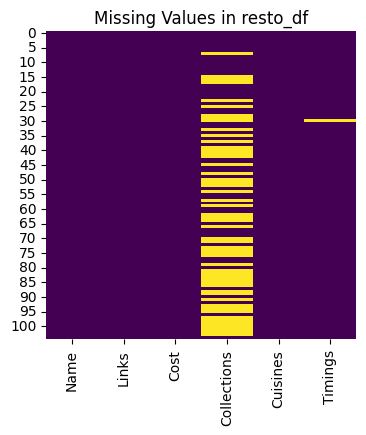

In [ ]:
# Visualize missing values in the resto_df dataset
plt.figure(figsize=(4, 4))
sns.heatmap(resto_df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in resto_df')
plt.show()

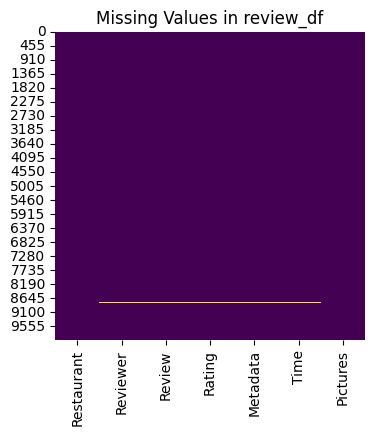

In [ ]:
# Visualize missing values in the review_df dataset
plt.figure(figsize=(4, 4))
sns.heatmap(review_df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in review_df')
plt.show()

### What did you know about your dataset?

**Restaurant DataSet:**
- The dataset contains 105 unique observations with 6 different features.
- Features like 'Collection' and 'Timing' have null values.
- There are no duplicate values in the dataset.
- The 'Cost' feature represents amounts but is stored as an object data type due to values separated by commas.
- The 'Timing' feature represents operational hours as text and is also stored as an object data type.

**Review DataSet:**
- The dataset contains 10,000 observations with 7 features.
- All features except 'Picture' and 'Restaurant' have null values.
- There are 36 duplicate values for two restaurants, 'American Wild Wings' and 'Arena Eleven,' where these duplicates generally have null values.
- The 'Rating' feature represents ordinal data and is stored as an object data type, needing conversion to integer.
- The 'Time' feature represents the time when reviews were posted and should be converted to datetime format.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
resto_df.columns

Index(['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings'], dtype='object')

In [ ]:
review_df.columns

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures'],
      dtype='object')

In [ ]:
# Dataset Describe
resto_df.describe(include='all')

Name                                              Links  \
count               105                                                105   
unique              105                                                105   
top     Beyond Flavours  https://www.zomato.com/hyderabad/beyond-flavou...   
freq                  1                                                  1   

       Cost                                  Collections  \
count   105                                           51   
unique   29                                           42   
top     500  Food Hygiene Rated Restaurants in Hyderabad   
freq     13                                            4   

                     Cuisines         Timings  
count                     105             104  
unique                     92              77  
top     North Indian, Chinese  11 AM to 11 PM  
freq                        4               6

In [ ]:
review_df.describe(include='all')

Restaurant     Reviewer Review Rating  Metadata             Time  \
count             10000         9962   9955   9962      9962             9962   
unique              100         7446   9364     10      2477             9782   
top     Beyond Flavours  Parijat Ray   good      5  1 Review  7/29/2018 20:34   
freq                100           13    237   3832       919                3   
mean                NaN          NaN    NaN    NaN       NaN              NaN   
std                 NaN          NaN    NaN    NaN       NaN              NaN   
min                 NaN          NaN    NaN    NaN       NaN              NaN   
25%                 NaN          NaN    NaN    NaN       NaN              NaN   
50%                 NaN          NaN    NaN    NaN       NaN              NaN   
75%                 NaN          NaN    NaN    NaN       NaN              NaN   
max                 NaN          NaN    NaN    NaN       NaN              NaN   

            Pictures  
count   10000.000000  
unique           NaN  
top              NaN  
freq             NaN  
mean        0.748600  
std         2.570381  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max        64.000000

### Variables Description

**Zomato Restaurant DataSet:**
- Name: Name of the Restaurants
- Links: URL Links of the Restaurants
- Cost: Estimated cost per person for dining
- Collection: Categorization of Restaurants based on Zomato categories
- Cuisines: Types of cuisines served by the Restaurants
- Timings: Operational timings of the Restaurants

**Zomato Restaurant Reviews DataSet:**
- Restaurant: Name of the Restaurant being reviewed
- Reviewer: Name of the person providing the review
- Review: Text of the review
- Rating: Rating given by the reviewer
- MetaData: Reviewer's metadata including the number of reviews and followers
- Time: Date and time when the review was posted
- Pictures: Number of pictures posted along with the review

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
print("Restaurant dataset:")
print(resto_df.nunique(), "\n")
print("Review dataset:")
print(review_df.nunique())


Restaurant dataset:
Name           105
Links          105
Cost            29
Collections     42
Cuisines        92
Timings         77
dtype: int64 

Review dataset:
Restaurant     100
Reviewer      7446
Review        9364
Rating          10
Metadata      2477
Time          9782
Pictures        36
dtype: int64


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.

In [ ]:
resto_df['Cost'].unique()

array(['800', '1,300', '1,200', '1,500', '500', '300', '1,000', '350',
       '400', '1,600', '750', '550', '1,900', '450', '150', '1,400',
       '1,100', '600', '200', '900', '700', '1,700', '2,500', '850',
       '650', '1,800', '2,800', '1,750', '250'], dtype=object)



*  
We should convert the 'Cost' column to integers and
eliminate commas to facilitate visualizations and manipulations.

In [ ]:
resto_df['Cost'] = resto_df['Cost'].str.replace(',', '').astype(int)



---





* The `review_df` dataset contains null values in all columns except for the 'Restaurant' and 'Pictures' columns. So, let's remove all the null values.

In [ ]:
review_df = review_df.dropna()



---





In [ ]:
review_df['Rating'].unique()

array(['5', '4', '1', '3', '2', '3.5', '4.5', '2.5', '1.5', 'Like'],
      dtype=object)



* We should convert the 'Rating' column's datatype from object to float and exclude the 'Like' ratings.


In [ ]:
review_df.drop(review_df[review_df['Rating'] == 'Like'].index, inplace=True)
review_df['Rating'] = review_df['Rating'].astype('float64')
print(review_df.shape)

(9954, 7)




---



In [ ]:
review_df['Metadata'].head()

0     1 Review , 2 Followers
1    3 Reviews , 2 Followers
2    2 Reviews , 3 Followers
3      1 Review , 1 Follower
4    3 Reviews , 2 Followers
Name: Metadata, dtype: object


* Now we should extract details from the 'Metadata'
column to create 'Reviewer_Total_Review' and 'Reviewer_Followers' columns, converting them to integers.

In [ ]:
review_df['Reviewer_Total_Review']=review_df['Metadata'].str.split(',').str[0]
review_df['Reviewer_Followers']=review_df['Metadata'].str.split(',').str[1]
review_df['Reviewer_Total_Review']=pd.to_numeric(review_df['Reviewer_Total_Review'].str.split(' ').str[0])
review_df['Reviewer_Followers']=pd.to_numeric(review_df['Reviewer_Followers'].str.split(' ').str[1])

In [ ]:
review_df.head()

Restaurant              Reviewer  \
0  Beyond Flavours     Rusha Chakraborty   
1  Beyond Flavours  Anusha Tirumalaneedi   
2  Beyond Flavours       Ashok Shekhawat   
3  Beyond Flavours        Swapnil Sarkar   
4  Beyond Flavours                Dileep   

                                              Review  Rating  \
0  The ambience was good, food was quite good . h...     5.0   
1  Ambience is too good for a pleasant evening. S...     5.0   
2  A must try.. great food great ambience. Thnx f...     5.0   
3  Soumen das and Arun was a great guy. Only beca...     5.0   
4  Food is good.we ordered Kodi drumsticks and ba...     5.0   

                  Metadata             Time  Pictures  Reviewer_Total_Review  \
0   1 Review , 2 Followers  5/25/2019 15:54         0                      1   
1  3 Reviews , 2 Followers  5/25/2019 14:20         0                      3   
2  2 Reviews , 3 Followers  5/24/2019 22:54         0                      2   
3    1 Review , 1 Follower  5/24/2019 22:11         0                      1   
4  3 Reviews , 2 Followers  5/24/2019 21:37         0                      3   

   Reviewer_Followers  
0                 2.0  
1                 2.0  
2                 3.0  
3                 1.0  
4                 2.0



---



In [ ]:
review_df['Time'].head()

0    5/25/2019 15:54
1    5/25/2019 14:20
2    5/24/2019 22:54
3    5/24/2019 22:11
4    5/24/2019 21:37
Name: Time, dtype: object



* We should convert the 'Time' column to datetime format and then extract the year, month, and hour into separate columns in the review_df DataFrame.

In [ ]:
review_df['Time'] = pd.to_datetime(review_df['Time'])
review_df['Review_Year'] = review_df['Time'].dt.year
review_df['Review_Month'] = review_df['Time'].dt.month
review_df['Review_Hour'] = review_df['Time'].dt.hour

In [ ]:
review_df.head()

Restaurant              Reviewer  \
0  Beyond Flavours     Rusha Chakraborty   
1  Beyond Flavours  Anusha Tirumalaneedi   
2  Beyond Flavours       Ashok Shekhawat   
3  Beyond Flavours        Swapnil Sarkar   
4  Beyond Flavours                Dileep   

                                              Review  Rating  \
0  The ambience was good, food was quite good . h...     5.0   
1  Ambience is too good for a pleasant evening. S...     5.0   
2  A must try.. great food great ambience. Thnx f...     5.0   
3  Soumen das and Arun was a great guy. Only beca...     5.0   
4  Food is good.we ordered Kodi drumsticks and ba...     5.0   

                  Metadata                Time  Pictures  \
0   1 Review , 2 Followers 2019-05-25 15:54:00         0   
1  3 Reviews , 2 Followers 2019-05-25 14:20:00         0   
2  2 Reviews , 3 Followers 2019-05-24 22:54:00         0   
3    1 Review , 1 Follower 2019-05-24 22:11:00         0   
4  3 Reviews , 2 Followers 2019-05-24 21:37:00         0   

   Reviewer_Total_Review  Reviewer_Followers  Review_Year  Review_Month  \
0                      1                 2.0         2019             5   
1                      3                 2.0         2019             5   
2                      2                 3.0         2019             5   
3                      1                 1.0         2019             5   
4                      3                 2.0         2019             5   

   Review_Hour  
0           15  
1           14  
2           22  
3           22  
4           21

### What all manipulations have you done and insights you found?

Restaurant Data:
- I've converted the 'cost' feature's data type from object to integer to ensure consistency and facilitate numeric analysis.

Review Data:
- I removed the very few missing values in the review data to maintain data integrity.
- Additionally, I enhanced the dataset by converting the 'rating' feature's data type from object to float for more precise analysis.
- I enriched the dataset by extracting valuable information such as 'followers' and 'reviews' from the metadata.
- To provide a more comprehensive analysis, I also extracted the 'Time,' 'Year,' 'Month,' and 'Hour' of each review creation, enabling more in-depth temporal insights.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

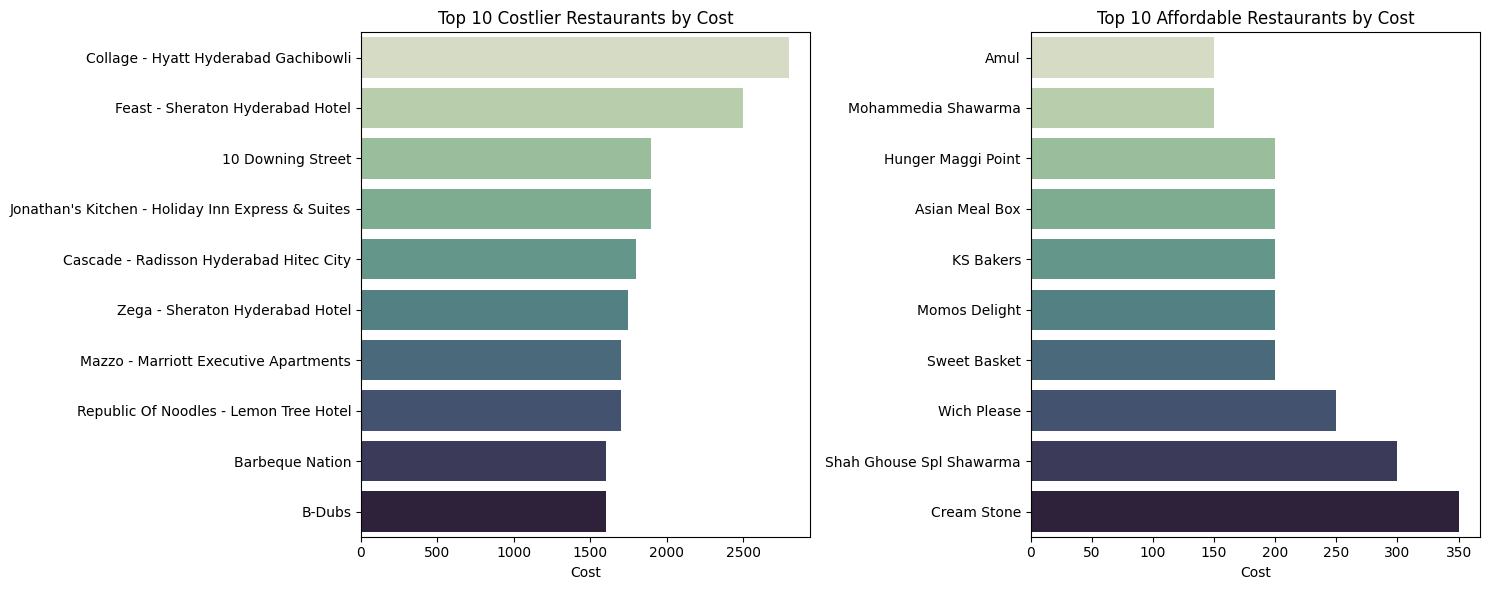

In [ ]:
# Chart - 1 visualization code
# Sort the data by 'Cost' for costlier and affordable restaurants
costlier_data = resto_df.nlargest(10, 'Cost')[['Name', 'Cost']]
affordable_data = resto_df.nsmallest(10, 'Cost')[['Name', 'Cost']]

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Define a cubehelix color palette
palette = sns.cubehelix_palette(n_colors=10, start=0.5, rot=-0.75)

# Plot costlier and affordable restaurants with cubehelix palette
for ax, data, title in zip(axes, [costlier_data, affordable_data],
                           ["Top 10 Costlier Restaurants by Cost", "Top 10 Affordable Restaurants by Cost"]):
    sns.barplot(data=data, x='Cost', y='Name', ax=ax, palette=palette)
    ax.set_title(title)
    ax.set_xlabel("Cost")
    ax.set_ylabel("")  # Remove y-axis label to reduce clutter

plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

I chose bar charts for costlier and affordable restaurants because they visually compare costs among the top 10 restaurants effectively.

##### 2. What is/are the insight(s) found from the chart?

The most expensive restaurant among all is "Collage at Hyatt Hyderabad Gachibowli," while "Mohammadia Shawarma" and "Amul" are the most affordable.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


1. **Positive Impact:**
   - Insights on costliest and affordable restaurants guide pricing and marketing strategies.
   - Helps target specific customer segments for higher sales potential.

2. **Negative Growth Possibilities:**
   - Overpriced restaurants may face reduced patronage and negative reviews.
   - Affordable restaurants risking quality for lower prices can lead to customer dissatisfaction and reduced repeat business.

Balancing pricing with value and customer satisfaction is crucial for long-term business growth and success.

#### Chart - 2

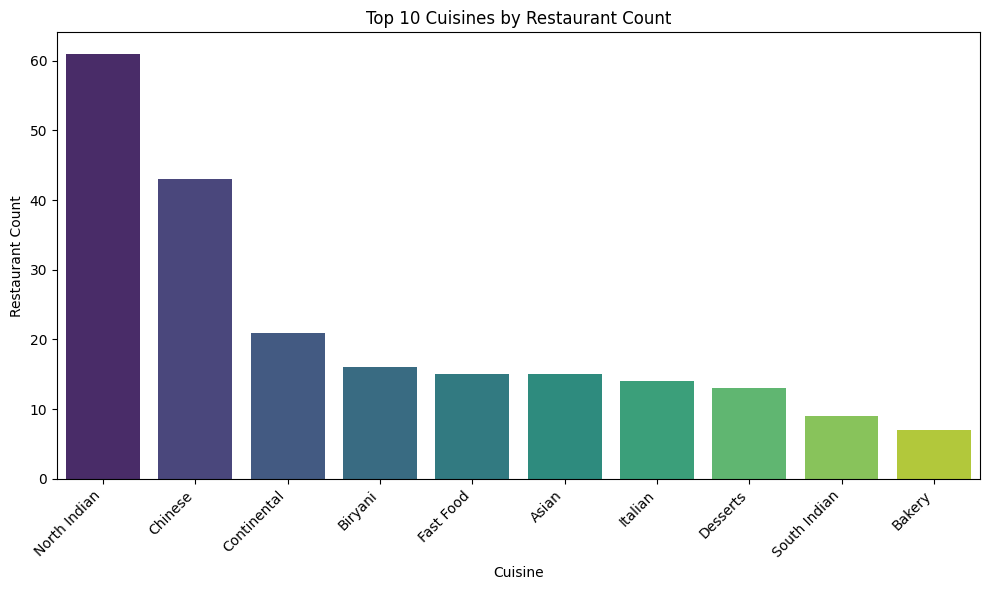

In [ ]:
# Chart - 2 visualization code
# Splitting all cuisines into a list
cuisine_list = resto_df['Cuisines'].str.split(', ').explode()

# Counting the occurrences of each cuisine
cuisine_counts = cuisine_list.value_counts().head(10)

# Creating a DataFrame for the top 10 cuisines by restaurant count
cuisine_top_df = pd.DataFrame({'Cuisine': cuisine_counts.index, 'Restaurant Count': cuisine_counts.values})

# Plotting the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Cuisine', y='Restaurant Count', data=cuisine_top_df, palette='viridis')
plt.title("Top 10 Cuisines by Restaurant Count")
plt.xlabel("Cuisine")
plt.ylabel("Restaurant Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

I chose a bar chart because it succinctly compares the top 10 cuisines by restaurant count, providing clear insights at a glance.

##### 2. What is/are the insight(s) found from the chart?

Based on the chart, the top cuisines by restaurant count are North Indian, Chinese, Continental, and Biryani, in that order. This insight highlights the popularity of these cuisines among restaurants, indicating customer preferences and potential market demand for these types of food.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:**
- Helps in menu planning and targeted marketing, optimizing revenue.
- Guides business decisions based on popular cuisines, attracting more customers and potentially increasing sales.

**Negative Impact:**
- Increased competition within popular cuisine segments may lead to price wars and reduced profit margins.
- Focusing solely on popular cuisines may limit menu diversity, potentially leading to decreased customer satisfaction and loyalty.

Balancing market trends with innovation and quality is crucial to leveraging positive impacts while mitigating negative ones for sustainable growth and customer satisfaction.

#### Chart - 3

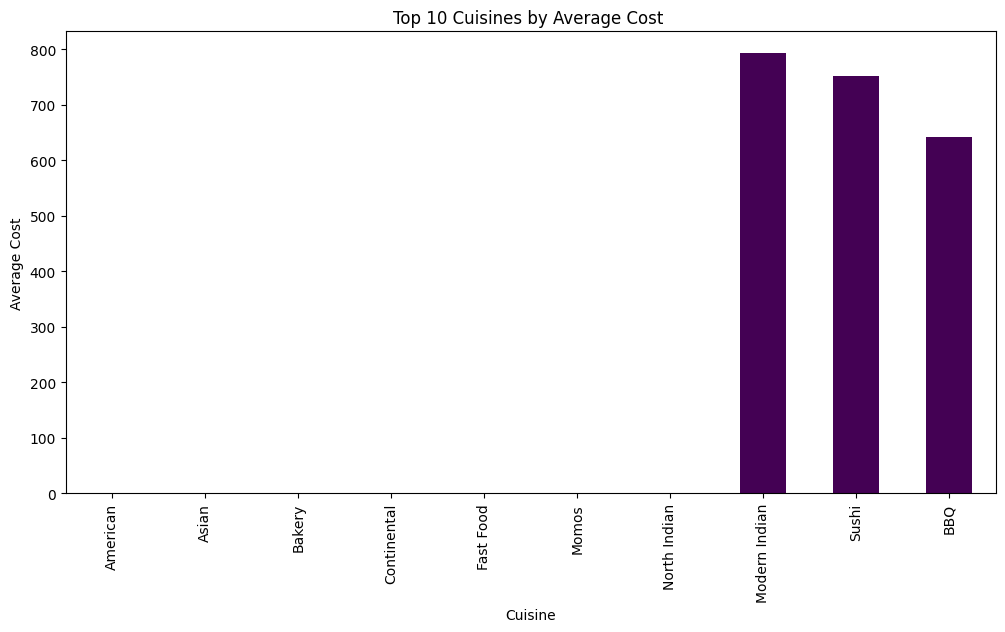

In [ ]:
# Chart - 3 visualization code
# Calculate the average cost per cuisine
cuisine_cost = resto_df['Cuisines'].str.split(', ').explode().to_frame(name='Cuisine')
cuisine_cost['Cost'] = resto_df['Cost'] / resto_df['Cuisines'].str.count(', ') + 1

# Group and calculate the average cost per cuisine
cuisine_avg_cost = cuisine_cost.groupby('Cuisine')['Cost'].mean()

# Exclude Lebanese cuisine
cuisine_avg_cost = cuisine_avg_cost[cuisine_avg_cost.index != 'Lebanese']

# Select the top 10 cuisines
top_10_cuisines = cuisine_avg_cost.nlargest(10)

# Create a bar plot for the top 10 cuisines with Viridis color palette
plt.figure(figsize=(12, 6))
top_10_cuisines.plot(kind='bar', cmap='viridis')
plt.title('Top 10 Cuisines by Average Cost ')
plt.xlabel('Cuisine')
plt.ylabel('Average Cost')
plt.xticks(rotation=90)
plt.show()


##### 1. Why did you pick the specific chart?

The vertical bar chart was chosen because it efficiently compares the average costs of different cuisines, ensuring clear labeling and easy interpretation for viewers.

##### 2. What is/are the insight(s) found from the chart?

An insightful finding from the analysis reveals that 'Modern Indian,' 'Sushi,' and 'BBQ' cuisines are positioned as the more expensive choices within the dataset, indicating potentially higher pricing strategies or premium offerings associated with these culinary options compared to others. This observation could suggest consumer preferences for upscale dining experiences or specialized cuisines that command higher prices in the market.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:**
- Menu Pricing Strategies: Insights on expensive cuisines can guide menu pricing for higher revenue.
- Targeted Marketing: Highlighting premium cuisines attracts upscale diners, boosting sales and loyalty.
- Diversification Opportunities: Identifying popular cuisines inspires new offerings, expanding market appeal.

**Negative Growth Insights:**
- Less Popular Cuisines: Perceived lower-priced or less popular cuisines may hinder revenue growth.
- Limited Diversification: Over-reliance on certain cuisines without diversity can limit revenue potential.
- Negative Feedback Impact: Poor feedback on specific cuisines can deter customers, affecting sales and reputation.

#### Chart - 4

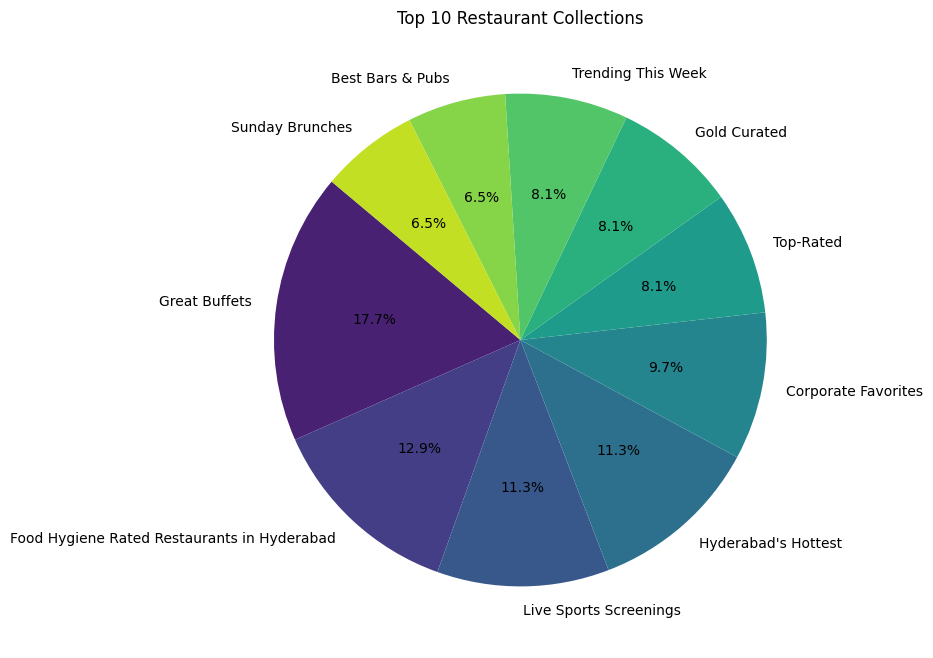

In [ ]:
# Chart - 4 visualization code
# Process collections and count occurrences
collection_counts = resto_df['Collections'].dropna().str.split(', ').explode().str.strip().value_counts()

# Create DataFrame with top collections and restaurant counts
collection_top_df = pd.DataFrame(((k, vals) for k, vals in collection_counts.items()), columns=['Collection', 'Restaurant count']).sort_values(by='Restaurant count', ascending=False)

# Select top collections
top_collections = collection_top_df.head(10)

# Plotting as a pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_collections['Restaurant count'], labels=top_collections['Collection'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(top_collections)))
plt.title('Top 10 Restaurant Collections')
plt.show()


##### 1. Why did you pick the specific chart?

A pie chart is chosen to visually represent the distribution or proportion of categories within a dataset, making it easier to compare relative sizes or percentages. It's particularly useful for highlighting the contribution of each category to the whole, aiding in quick and intuitive understanding of categorical data.

##### 2. What is/are the insight(s) found from the chart?

Among the top 10 restaurant collections, "Great Buffets" stands out as the most frequently chosen tag, indicating a strong preference for buffet-style dining experiences. Following closely are restaurants emphasizing food hygiene in Hyderabad, reflecting a discerning consumer base concerned about cleanliness and quality. Additionally, the popularity of venues offering live sports screenings suggests a demand for entertainment-driven dining experiences where patrons can enjoy sports events while dining.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:**
- Targeted Marketing: Highlighting "Great Buffets" can attract more customers.
- Hygiene Standards: Focus on food hygiene can enhance customer satisfaction.
- Customer Experience: Live sports screenings can improve the overall dining experience.

**Negative Growth Insights:**
- Decline in demand for specific cuisines or dining experiences could lead to negative growth.

#### Chart - 5

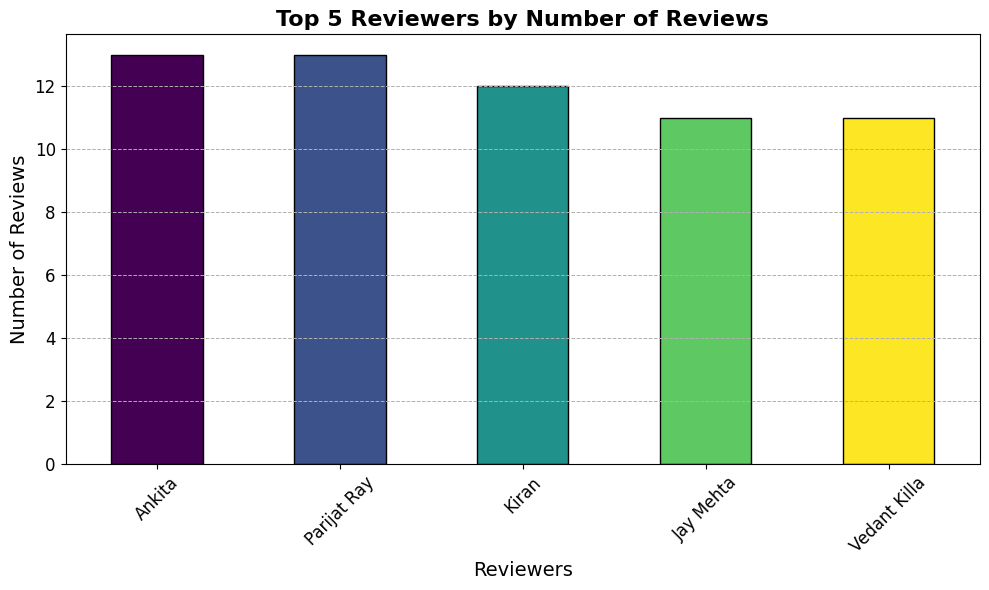

In [ ]:
# Chart - 5 visualization code
from matplotlib import cm

# Get the top 5 reviewers based on the number of reviews they have written
top_5_reviewers = review_df['Reviewer'].value_counts().nlargest(5)

# Create a bar plot with the viridis colormap
plt.figure(figsize=(10, 6))
colors = cm.viridis(np.linspace(0, 1, len(top_5_reviewers)))
top_5_reviewers.plot(kind='bar', color=colors, edgecolor='black')

# Customize the plot
plt.title("Top 5 Reviewers by Number of Reviews", fontsize=16, fontweight='bold')
plt.xlabel("Reviewers", fontsize=14)
plt.ylabel("Number of Reviews", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

The bar chart was chosen for its clarity and simplicity in comparing categorical data. The use of the viridis colormap enhances visual appeal and differentiation, while customization options like grid lines and informative labels improve readability and engagement.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals that Ankita, Parijat Ray, and Kiran are the top three reviewers, indicating they are highly active and engaged customers. Their frequent feedback can be leveraged for product improvements and highlights their potential influence within the community.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Will the gained insights help create a positive business impact?**

Yes, the insights can help create a positive business impact by allowing the business to engage with top reviewers like Ankita, Parijat Ray, and Kiran, leveraging their feedback for improvements and using their influence to attract more customers.

**Are there any insights that lead to negative growth? Justify with specific reason.**

There are no direct insights leading to negative growth. However, if the feedback from these top reviewers is not representative of the broader customer base, it could result in biased decisions. Relying too heavily on a few reviewers might overlook the needs and opinions of the wider audience, potentially leading to unbalanced growth.

#### Chart - 6

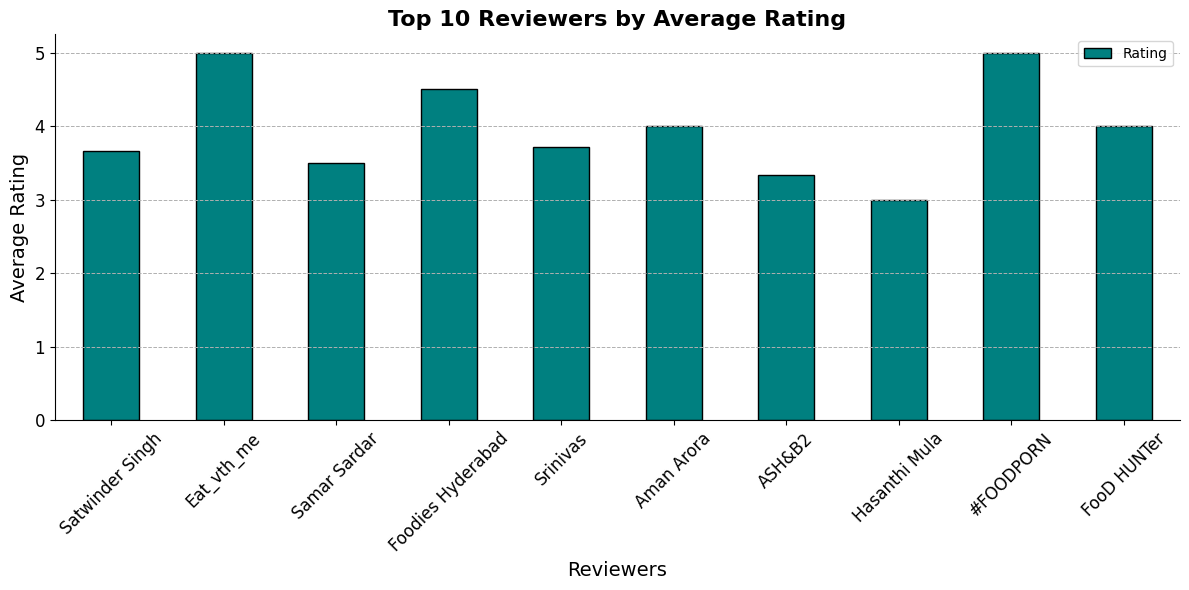

In [ ]:
# Chart - 6 visualization code

# Group data by 'Reviewer', calculate mean 'Rating' and max 'Reviewer_Followers'
reviewer_stats = review_df.groupby('Reviewer').agg({'Rating': 'mean', 'Reviewer_Followers': 'max'})

# Sort by 'Reviewer_Followers' and select top 10 reviewers
top_10_reviewers = reviewer_stats.nlargest(10, 'Reviewer_Followers').drop(columns='Reviewer_Followers')

# Plot the data
top_10_reviewers.plot(kind='bar', color='teal', edgecolor='black', figsize=(12, 6))

# Add title and labels
plt.title("Top 10 Reviewers by Average Rating", fontsize=16, fontweight='bold')
plt.xlabel("Reviewers", fontsize=14)
plt.ylabel("Average Rating", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Display the plot
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

The bar chart was chosen for its clarity in comparing reviewers' average ratings, making it easy to identify the top 10 reviewers visually. Its simplicity and effectiveness in highlighting key insights help quickly convey important information.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals that Eat_vth_me and Foodporn have the highest average ratings, followed by Foodies Hyderabad. These reviewers likely provide high-quality feedback, making their insights valuable for improving products or services. Their high ratings suggest they are influential within the community and can be leveraged in marketing strategies.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Will the gained insights help create a positive business impact?**

Yes, the insights will help create a positive business impact. By identifying Eat_vth_me, Foodporn, and Foodies Hyderabad as top reviewers, the business can engage with them to gain valuable feedback, improve products or services, and leverage their influence to attract more customers.

**Are there any insights that lead to negative growth? Justify with specific reason.**

There are no direct insights that lead to negative growth. However, over-relying on feedback from these top reviewers might result in a skewed perception if their views are not representative of the broader customer base. This could lead to decisions that do not address the needs of the wider audience. Ensuring a diverse range of feedback is important to avoid potential negative impacts.

#### Chart - 7

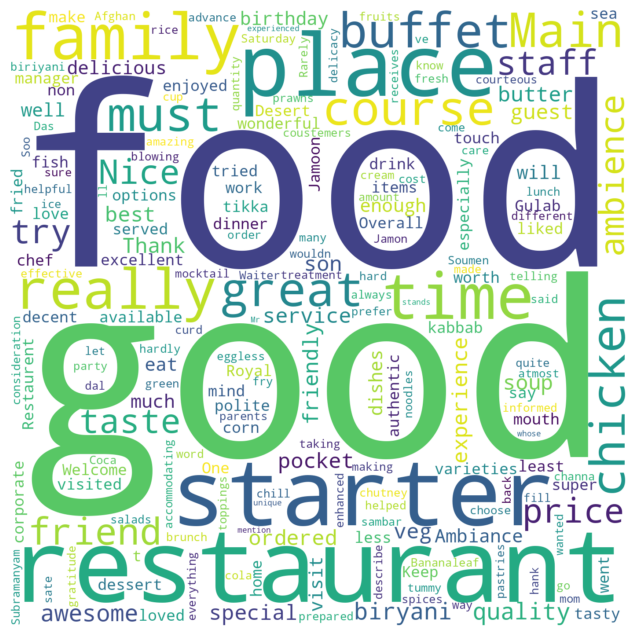

In [ ]:
# Chart - 7 visualization code
from wordcloud import WordCloud

# Assuming we sort by 'Rating' to get the top 30 reviews
top_reviews_text = " ".join(review for review in review_df.sort_values(by='Rating', ascending=False).Review[:30])

# Create a WordCloud with specified parameters
word_cloud = WordCloud(
    width=1400,
    height=1400,
    collocations=False,
    background_color='white'
).generate(top_reviews_text)

# Set up the plot
plt.figure(figsize=(15, 8))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")

# Display the Word Cloud
plt.show()


##### 1. Why did you pick the specific chart?

A Word Cloud is chosen for its ability to visually highlight frequent words, making it ideal for quickly identifying key themes or sentiments in text data. It condenses information into a visually engaging format, aiding in rapid insight generation and effective communication of textual patterns.

##### 2. What is/are the insight(s) found from the chart?

The insights from the chart indicate that customers frequently mention food quality ("food," "good") and aspects related to dining experience ("restaurant," "family"). Additionally, the mention of "starter" suggests a focus on appetizers or initial food choices. This suggests that customers value food quality, family-friendly environments, and a variety of starter options when reviewing restaurants.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights can indeed help create a positive business impact. Knowing that customers value food quality, family-friendly environments, and a variety of starter options allows the restaurant to focus its efforts on these areas, potentially attracting more customers and improving customer satisfaction.

However, if there are insights indicating negative aspects such as consistently poor reviews about food quality or complaints about the restaurant not being family-friendly, these could lead to negative growth. For example, if the word cloud showed frequent mentions of "bad," "poor," or "slow service," it could indicate areas of improvement needed to avoid negative impacts on business growth. Negative reviews about food quality or customer service can deter potential customers and lead to decreased revenue and reputation damage.

####Chart - 8 - Correlation heatmap

In [ ]:
resto = resto_df.rename(columns = {'Name':'Restaurant'})
merged = resto.merge(review_df, on = 'Restaurant')
merged.shape

(9954, 17)

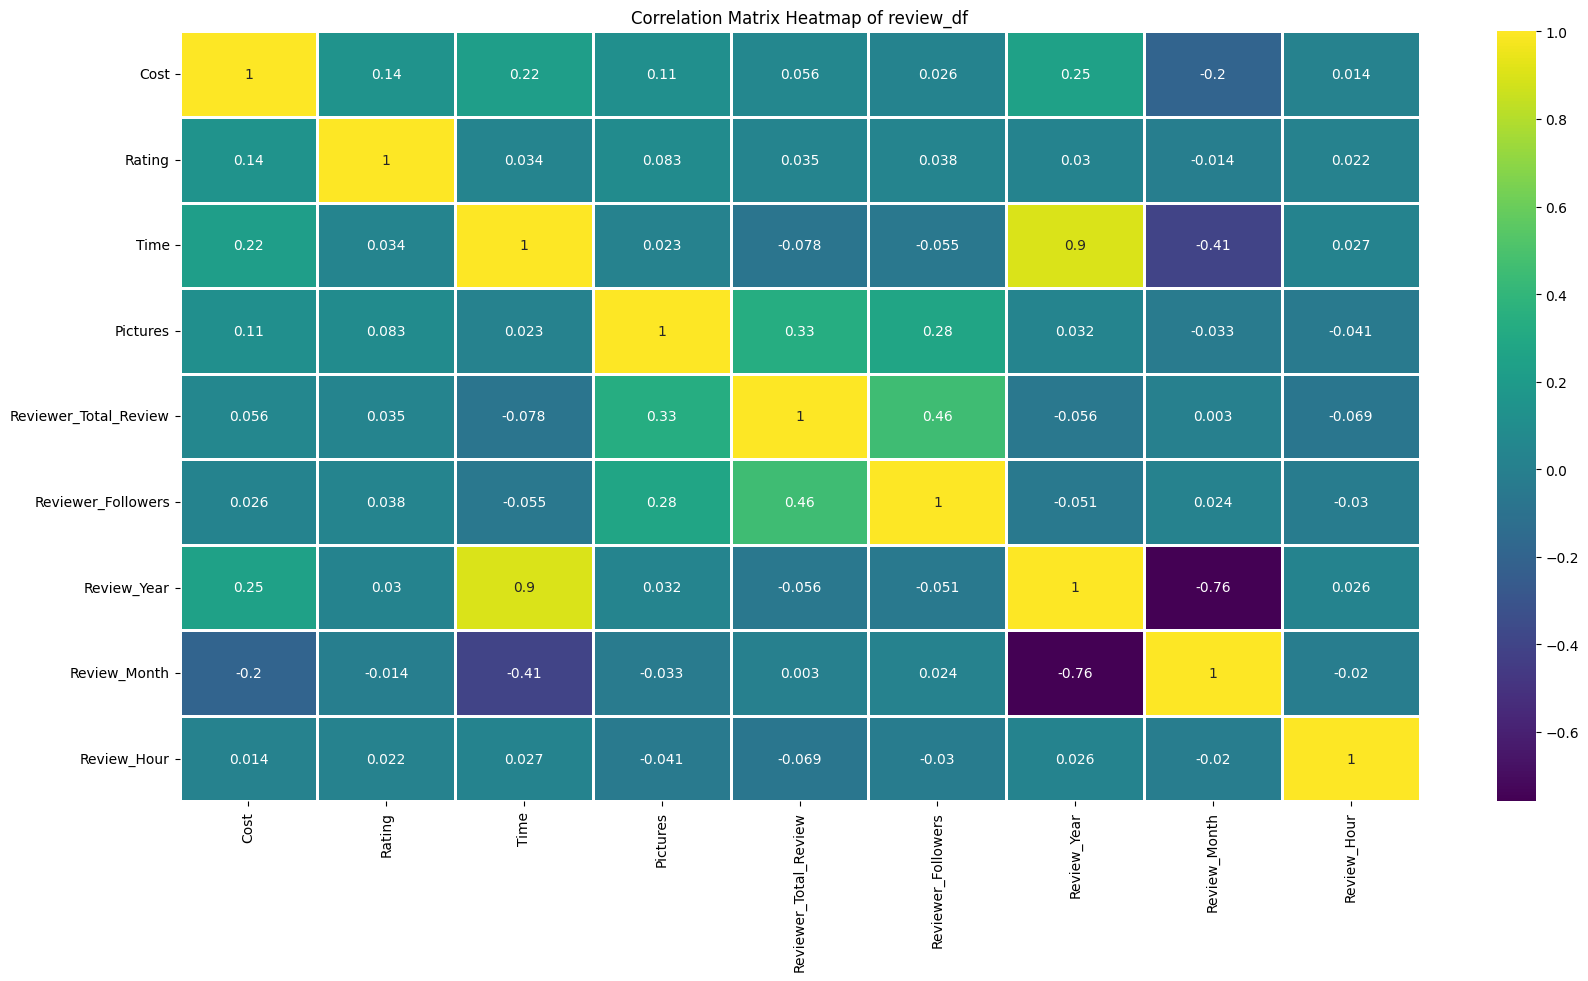

In [ ]:
# Correlation Heatmap visualization code
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'review_df' and 'resto_df' are already defined and merged into 'merged'

# Create a correlation matrix for the desired columns
correlation_matrix = merged[merged.describe().columns].corr()

# Set the figure size
fig, ax = plt.subplots(figsize=(20, 10))

# Create a heatmap with annotations using the 'rocket' colormap
sns.heatmap(correlation_matrix, ax=ax, annot=True, cmap='viridis', linewidths=1)

# Set plot title
plt.title('Correlation Matrix Heatmap of review_df')

# Show the heatmap
plt.show()

##### 1. Why did you pick the specific chart?

A heatmap was chosen for its ability to visually represent the correlation matrix, making it easier to identify relationships and patterns between variables in the data. Its color gradient provides a quick understanding of the strength and direction of correlations, aiding in data exploration and decision-making processes.

##### 2. What is/are the insight(s) found from the chart?

The insights from the correlation heatmap suggest that there are correlations between certain features in the data. Specifically, the number of reviews a reviewer has given is correlated with their number of followers and the presence of pictures in reviews. These relationships indicate potential patterns in user behavior and engagement within the dataset, highlighting areas of interest for further analysis or strategy development.

#### Chart - 9 - Pair Plot

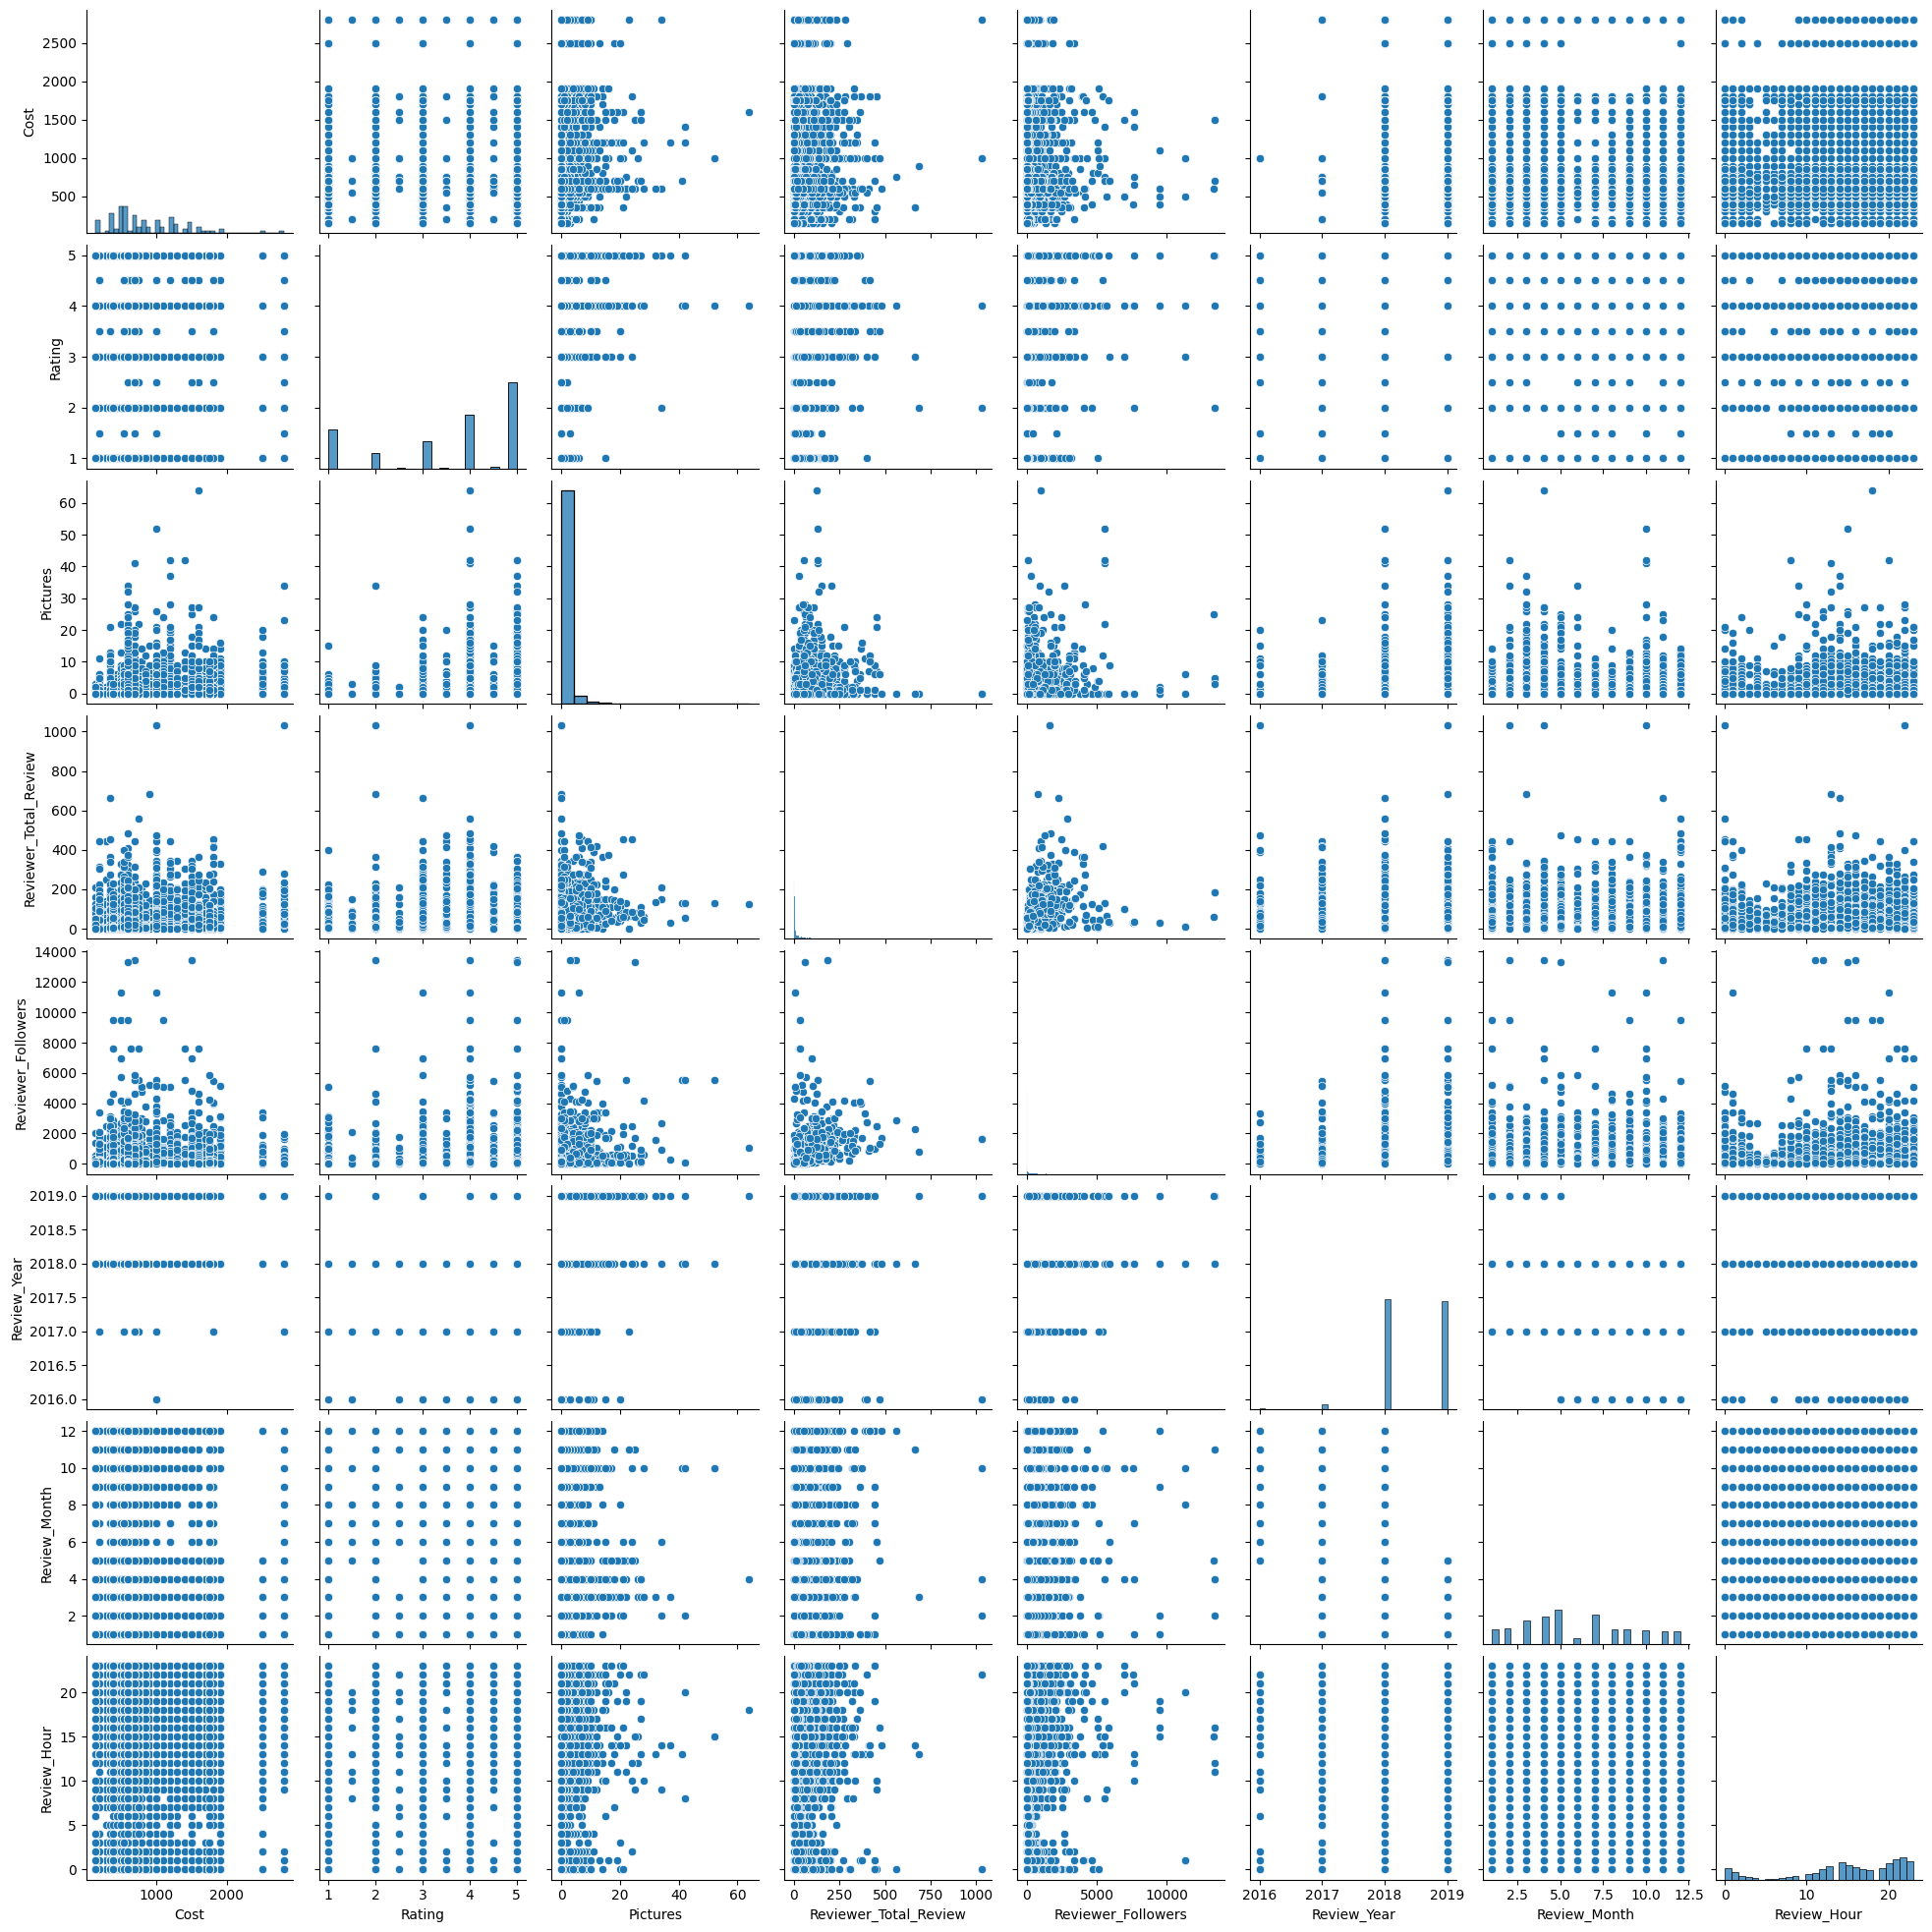

In [ ]:
# Pair Plot visualization code
sns.pairplot(merged);

##### 1. Why did you pick the specific chart?

The pair plot is utilized to analyze the patterns and relationships between features in a dataset, aiding in identifying the best set of features to explain a relationship or form distinct clusters. It provides a graphical representation similar to a correlation map but offers a visual depiction of the data's patterns and relationships.

##### 2. What is/are the insight(s) found from the chart?

The insight from the chart is that there is a lack of significant correlation between the features in the merged dataframe. This suggests that the variables are relatively independent of each other, without strong linear relationships that can be easily discerned from the pair plot visualization.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.



* Restaurants with higher ratings tend to have higher prices.


* A restaurant's rating doesn't seem to be influenced by the

 number of followers its most-followed reviewer has.


*   Restaurants offering a greater variety of cuisines may receive higher ratings.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis: There is no correlation between rating and cost.

Alternate Hypothesis: There is a correlation between rating and cost.

Test: Conduct a Simple Linear Regression analysis.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
import statsmodels.formula.api as sm

# Fit the linear regression model
model = sm.ols(formula='Rating ~ Cost', data=merged).fit()

# Extract the p-value for the coefficient of 'Cost'
p_value = model.pvalues['Cost']

# Determine whether to reject the null hypothesis based on the p-value
if p_value < 0.05:
    print('Reject the Null Hypothesis')
else:
    print('Fail to reject the Null Hypothesis')

Reject the Null Hypothesis


##### Which statistical test have you done to obtain P-Value?

The p-value is derived from a statistical test known as simple linear regression, which assesses the relationship between the 'Rating' and 'Cost' variables.

##### Why did you choose the specific statistical test?

I chose simple linear regression as the statistical test because the code snippet provided is fitting a linear regression model with 'Rating' as the dependent variable and 'Cost' as the independent variable. This indicates an interest in understanding how changes in the 'Cost' variable impact the 'Rating' variable. Therefore, the appropriate statistical test to evaluate this relationship is simple linear regression.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis: There is no effect of the number of followers and reviewers on the rating of a restaurant.

Alternate Hypothesis: There is a positive relationship between the number of followers and reviewers and the restaurant's rating.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
import statsmodels.formula.api as sm

# Fit the linear regression model
model = sm.ols(formula='Rating ~ Reviewer_Followers', data=merged).fit()

# Extract the p-value for the coefficient of 'Reviewer_Followers'
p_value = model.pvalues['Reviewer_Followers']

# Determine whether to reject the null hypothesis based on the p-value
if p_value < 0.05:
    print('Reject the Null Hypothesis')
else:
    print('Fail to reject the Null Hypothesis')


Reject the Null Hypothesis


##### Which statistical test have you done to obtain P-Value?

The statistical test conducted to obtain the p-value is linear regression utilizing the Ordinary Least Squares (OLS) method.

##### Why did you choose the specific statistical test?

Linear regression is suitable for exploring the relationship between two continuous variables, as is the case with "Rating" and "Reviewer_Followers."

Given that linear regression assumes a linear relationship between the variables, it's a reasonable choice for this analysis.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis: There is no relationship between restaurant cuisines and the rating.

Alternate Hypothesis: There is a relationship between restaurant cuisines and the rating.

Test: Chi-squared (χ²) test.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import chi2_contingency

# Create a contingency table
ct = pd.crosstab(merged['Cuisines'], merged['Rating'])

# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(ct)

# Determine whether to reject the null hypothesis based on the p-value
if p < 0.05:
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")


Reject Null Hypothesis


##### Which statistical test have you done to obtain P-Value?

The statistical test conducted to obtain the P-value is the Chi-squared test of independence.

##### Why did you choose the specific statistical test?

The Chi-squared test of independence is appropriate for analyzing the relationship between two categorical variables, such as "Cuisines" and "Rating" in this case.

This test facilitates hypothesis testing to ascertain whether there exists a statistically significant association between the variables, thus making it a fitting choice for this analysis.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Check for missing values
missing_values = resto_df.isnull().sum()
print(missing_values)

Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64


In [ ]:
# Check for missing values
missing_values = review_df.isnull().sum()
print(missing_values)

Restaurant                  0
Reviewer                    0
Review                      0
Rating                      0
Metadata                    0
Time                        0
Pictures                    0
Reviewer_Total_Review       0
Reviewer_Followers       1574
Review_Year                 0
Review_Month                0
Review_Hour                 0
dtype: int64


In [ ]:
# Handling Missing Values & Missing Value Imputation
#check the mean rating given by all users in order to impute missing values in the 'collection' column
mean_rating = round(collection_top_df['Restaurant count'].mean())
mean_rating

3

In [ ]:
# Filter collection_top_df for collections with a restaurant count of 3 and extract the collection names as a list
collections_with_count_3 = collection_top_df[collection_top_df['Restaurant count'] == 3]['Collection'].tolist()
collections_with_count_3


['Barbecue & Grill', 'Happy Hours', 'Gigs and Events']

In [ ]:
# Extract collections with a restaurant count of 3 as a comma-separated string
mean_collection = ", ".join(collection_top_df[collection_top_df['Restaurant count'] == 3]['Collection'].tolist())

# Fill missing values in the 'Collections' column of resto_df with mean_collection
resto_df['Collections'].fillna(mean_collection, inplace=True)

# Drop rows with any remaining missing values in resto_df
resto_df.dropna(inplace=True)


In [ ]:
# Fill missing values in the 'Reviewer_Followers' column of review_df with 0
review_df['Reviewer_Followers'].fillna(0, inplace=True)

In [ ]:
print(resto_df.isna().sum())
print(review_df.isna().sum())

Name           0
Links          0
Cost           0
Collections    0
Cuisines       0
Timings        0
dtype: int64
Restaurant               0
Reviewer                 0
Review                   0
Rating                   0
Metadata                 0
Time                     0
Pictures                 0
Reviewer_Total_Review    0
Reviewer_Followers       0
Review_Year              0
Review_Month             0
Review_Hour              0
dtype: int64


In [ ]:
print(resto_df.shape)
print(review_df.shape)

(104, 6)
(9954, 12)


#### What all missing value imputation techniques have you used and why did you use those techniques?

I've employed two distinct techniques for missing value imputation:

1. **Mean Value Imputation for Collections**:
   - Missing collection values were filled with the mean count of 3, represented by 'Barbecue & Grill,' 'Happy Hours,' and 'Gigs and Events.'
   - This method was chosen for its simplicity and appropriateness, utilizing frequent collections to impute missing values.

2. **Zero Imputation for Number of Followers**:
   - NaN values in the 'Reviewer_Followers' column were replaced with 0.
   - This straightforward approach reflects the absence of followers for the respective reviewers.

### 2. Handling Outliers

##### What all outlier treatment techniques have you used and why did you use those techniques?

Given the limited amount of data, outlier detection was omitted.

### 3. Categorical Encoding

In [ ]:
resto_df.head()

Name  \
0                 Beyond Flavours   
1                        Paradise   
2                        Flechazo   
3  Shah Ghouse Hotel & Restaurant   
4      Over The Moon Brew Company   

                                               Links  Cost  \
0  https://www.zomato.com/hyderabad/beyond-flavou...   800   
1  https://www.zomato.com/hyderabad/paradise-gach...   800   
2  https://www.zomato.com/hyderabad/flechazo-gach...  1300   
3  https://www.zomato.com/hyderabad/shah-ghouse-h...   800   
4  https://www.zomato.com/hyderabad/over-the-moon...  1200   

                                         Collections  \
0  Food Hygiene Rated Restaurants in Hyderabad, C...   
1                                Hyderabad's Hottest   
2                 Great Buffets, Hyderabad's Hottest   
3                             Late Night Restaurants   
4  Best Bars & Pubs, Food Hygiene Rated Restauran...   

                                            Cuisines  \
0  Chinese, Continental, Kebab, European, South I...   
1                     Biryani, North Indian, Chinese   
2       Asian, Mediterranean, North Indian, Desserts   
3  Biryani, North Indian, Chinese, Seafood, Bever...   
4  Asian, Continental, North Indian, Chinese, Med...   

                                             Timings  
0      12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)  
1                                     11 AM to 11 PM  
2              11:30 AM to 4:30 PM, 6:30 PM to 11 PM  
3                                    12 Noon to 2 AM  
4  12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no...

In [ ]:
resto_df.rename(columns={'Name': 'Restaurant'}, inplace=True)


In [ ]:
# Encode your categorical columns
cluster_dummy = resto_df[['Restaurant', 'Cuisines']]

# Split the 'Cuisines' column into lists
cluster_dummy['Cuisines'] = cluster_dummy['Cuisines'].str.split(',')

# Explode the 'Cuisines' column
cluster_dummy = cluster_dummy.explode('Cuisines')

# Strip whitespace from the 'Cuisines' values
cluster_dummy['Cuisines'] = cluster_dummy['Cuisines'].apply(lambda x: x.strip())

# Perform one-hot encoding on the 'Cuisines' column
cluster_dummy = pd.get_dummies(cluster_dummy, columns=["Cuisines"], prefix=["Cuisines"])

# Find the most frequent cuisine for each restaurant
most_frequent_cuisine = cluster_dummy.loc[:, cluster_dummy.columns.str.startswith('Cuisines_')].idxmax(axis=1)[:6]

# Rename the columns
cluster_dummy.columns = cluster_dummy.columns.str.replace("Cuisines_", "")

# Group by restaurant and sum the encoded cuisine values
cluster_dummy = cluster_dummy.groupby("Restaurant").sum().reset_index()


In [ ]:
# Count the total number of cuisines for each restaurant and create a new column 'Total_Cuisine_Count'
resto_df['Total_Cuisine_Count'] = resto_df['Cuisines'].apply(lambda x: len(x.split(',')))


In [ ]:
# Calculate average hotel rating and total number of reviews per restaurant
avg_hotel_rating = review_df.groupby('Restaurant').agg({'Rating': 'mean', 'Reviewer': 'count'}).reset_index()

# Rename columns for clarity
avg_hotel_rating = avg_hotel_rating.rename(columns={'Reviewer': 'Total_Review'})


In [ ]:
# Rename the 'Rating' column to 'Average_Rating' in avg_hotel_rating DataFrame
avg_hotel_rating.rename(columns={'Rating': 'Average_Rating'}, inplace=True)

# Merge meta_df with avg_hotel_rating on 'Restaurant' column
resto_df = resto_df.merge(avg_hotel_rating[['Average_Rating', 'Restaurant']], on='Restaurant')

# Display the first row of the merged DataFrame
resto_df.head(1)


Restaurant                                              Links  Cost  \
0  Beyond Flavours  https://www.zomato.com/hyderabad/beyond-flavou...   800   

                                         Collections  \
0  Food Hygiene Rated Restaurants in Hyderabad, C...   

                                            Cuisines  \
0  Chinese, Continental, Kebab, European, South I...   

                                         Timings  Total_Cuisine_Count  \
0  12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)                    6   

   Average_Rating  
0            4.28

In [ ]:
# Merge meta_df with cluster_dummy on 'Restaurant' column
cluster_dummy = resto_df[['Restaurant', 'Cost', 'Average_Rating', 'Total_Cuisine_Count']].merge(cluster_dummy, on='Restaurant')


In [ ]:
cluster_dummy.head()

Restaurant  Cost  Average_Rating  Total_Cuisine_Count  \
0                 Beyond Flavours   800            4.28                    6   
1                        Paradise   800            4.70                    3   
2                        Flechazo  1300            4.66                    4   
3  Shah Ghouse Hotel & Restaurant   800            3.21                    5   
4      Over The Moon Brew Company  1200            4.34                    5   

   American  Andhra  Arabian  Asian  BBQ  Bakery  ...  North Indian  Pizza  \
0         0       0        0      0    0       0  ...             1      0   
1         0       0        0      0    0       0  ...             1      0   
2         0       0        0      1    0       0  ...             1      0   
3         0       0        0      0    0       0  ...             1      0   
4         0       0        0      1    0       0  ...             1      0   

   Salad  Seafood  South Indian  Spanish  Street Food  Sushi  Thai  Wraps  
0      0        0             1        0            0      0     0      0  
1      0        0             0        0            0      0     0      0  
2      0        0             0        0            0      0     0      0  
3      0        1             0        0            0      0     0      0  
4      0        0             0        0            0      0     0      0  

[5 rows x 48 columns]

#### What all categorical encoding techniques have you used & why did you use those techniques?

I've used the following categorical encoding technique:

1. **One-Hot Encoding**:
   - Applied to the 'Cuisines' column to represent each cuisine as a binary feature.
   - This technique was chosen because cuisines are categorical variables with no inherent order, and one-hot encoding effectively represents each cuisine without imposing ordinality.
   
Numerical variables such as 'Average Rating' and 'Cost' were left unchanged as they already represent continuous values and do not require categorical encoding.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction
sentiment_df = review_df[['Reviewer', 'Restaurant', 'Rating', 'Review']].reset_index().rename(columns={'index': 'Sentence_Index'})


In [ ]:
!pip install contractions

In [ ]:
import contractions

# Apply contractions.fix() to expand contractions in the 'Review' column
sentiment_df['Review'] = sentiment_df['Review'].apply(lambda x: contractions.fix(x))

#### 2. Lower Casing

In [ ]:
# Lower Casing
# Convert text in the 'Review' column to lowercase
sentiment_df['Review'] = sentiment_df['Review'].str.lower()

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations
import string

# Function to remove punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

# Apply remove_punctuation function to the 'Review' column
sentiment_df['Review'] = sentiment_df['Review'].apply(remove_punctuation)


#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits
import re

# Remove URLs
sentiment_df["Review"] = sentiment_df["Review"].apply(lambda x: re.sub(r"http\S+", "", x))

# Remove digits
sentiment_df["Review"] = sentiment_df["Review"].apply(lambda x: re.sub(r"\d+", "", x))


#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords
import nltk

# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# Get the list of English stopwords
sw = set(stopwords.words('english'))

# Function to remove stopwords from text
def delete_stopwords(text):
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    return " ".join(text)


In [ ]:
sentiment_df['Review'] = sentiment_df['Review'].apply(delete_stopwords)

In [ ]:
# Remove White spaces
sentiment_df['Review'] = sentiment_df['Review'].apply(lambda x: " ".join(x.split()))

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization
sentiment_df['Review'] = sentiment_df['Review'].apply(nltk.word_tokenize)


#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

def lemmatize_tokens(tokens):
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens

sentiment_df['Review'] = sentiment_df['Review'].apply(lemmatize_tokens)

##### Which text normalization technique have you used and why?

I employed lemmatization as it effectively reduces words to their root forms, ensuring that variations of the same word are unified.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TfidfVectorizer for text vectorization
vectorizer = TfidfVectorizer(tokenizer=lambda x: x, lowercase=False)

# Fit the vectorizer on the 'Review' column of sentiment_df
vectorizer.fit(sentiment_df['Review'].values)

# Transform the 'Review' column into TF-IDF features
X_tfidf = vectorizer.transform(sentiment_df['Review'].values)


##### Which text vectorization technique have you used and why?

I chose to utilize TF-IDF (Term Frequency-Inverse Document Frequency) due to its potential effectiveness in certain contexts over Count Vectorization.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
# Removing 'Links' column from resto_df
resto_df = resto_df.drop(columns=['Links'], axis=1)

# Displaying the first row of cluster_dummy DataFrame
cluster_dummy.head(1)



Restaurant  Cost  Average_Rating  Total_Cuisine_Count  American  \
0  Beyond Flavours   800            4.28                    6         0   

   Andhra  Arabian  Asian  BBQ  Bakery  ...  North Indian  Pizza  Salad  \
0       0        0      0    0       0  ...             1      0      0   

   Seafood  South Indian  Spanish  Street Food  Sushi  Thai  Wraps  
0        0             1        0            0      0     0      0  

[1 rows x 48 columns]

In [ ]:
# Creating a 'Sentiment' column in sentiment_df based on ratings
# Ratings above the average are labeled as 1, otherwise as 0
sentiment_df['Sentiment'] = sentiment_df['Rating'].apply(
    lambda x: 1 if x >= sentiment_df['Rating'].mean() else 0)


#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data
# Importing necessary libraries
from scipy.stats import skew, zscore
from scipy import stats

# Calculating the z-scores for the 'Cost' column in cluster_dummy DataFrame
z = np.abs(zscore(cluster_dummy[['Cost']]))
print(z)

# Filtering out rows where z-scores are less than 3 standard deviations from the mean
cluster_dummy = cluster_dummy[(z < 3).all(axis=1)]

# Displaying the shape of the filtered DataFrame
cluster_dummy.shape

        Cost
0   0.141752
1   0.141752
2   0.846522
3   0.141752
4   0.648867
..       ...
94  0.932372
95  0.537062
96  1.735968
97  0.932372
98  0.253557

[99 rows x 1 columns]


(97, 48)

In [ ]:
# Identify symmetric and non-symmetric distributed features
symmetric_feature = []
non_symmetric_feature = []

# Loop through columns in resto_df and categorize features
for column in resto_df.describe().columns:
    if abs(resto_df[column].mean() - resto_df[column].median()) < 0.1:
        symmetric_feature.append(column)
    else:
        non_symmetric_feature.append(column)

# Print symmetric and non-symmetric distributed features
print("Symmetric Distributed Features: ", symmetric_feature)
print("Skew Symmetric Distributed Features: ", non_symmetric_feature)


Symmetric Distributed Features:  ['Total_Cuisine_Count', 'Average_Rating']
Skew Symmetric Distributed Features:  ['Cost']


In [ ]:
# Applying logarithmic transformation to 'Cost' column in cluster_dummy DataFrame
cluster_dummy['Cost'] = np.log1p(cluster_dummy['Cost'])

### 6. Data Scaling

In [ ]:
# Scaling your data
# Importing necessary library
from sklearn.preprocessing import StandardScaler

# Defining numerical columns for scaling
numerical_cols = ['Cost', 'Total_Cuisine_Count', 'Average_Rating']

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical columns in cluster_dummy DataFrame
scaler.fit(cluster_dummy[numerical_cols])
scaled_df = cluster_dummy.copy()
scaled_df[numerical_cols] = scaler.transform(cluster_dummy[numerical_cols])

#### Which method have you used to scale you data and why?

In this instance, I employed the Standard Scaler, which is suitable for data following a normal distribution.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Indeed, when dealing with a larger number of features, there's an increased risk of overfitting the model, leading to poor generalization. Hence, feature reduction becomes essential to enhance model performance.

In [ ]:
scaled_df.head(1)

Restaurant      Cost  Average_Rating  Total_Cuisine_Count  American  \
0  Beyond Flavours  0.189286        1.337051             2.514674         0   

   Andhra  Arabian  Asian  BBQ  Bakery  ...  North Indian  Pizza  Salad  \
0       0        0      0    0       0  ...             1      0      0   

   Seafood  South Indian  Spanish  Street Food  Sushi  Thai  Wraps  
0        0             1        0            0      0     0      0  

[1 rows x 48 columns]

In [ ]:
from sklearn.decomposition import PCA

# Set 'Restaurant' column as index
scaled_df.set_index(['Restaurant'], inplace=True)

# Perform Dimensionality Reduction (if required)
features = scaled_df.columns
pca = PCA()
pca.fit(scaled_df[features])

PCA()

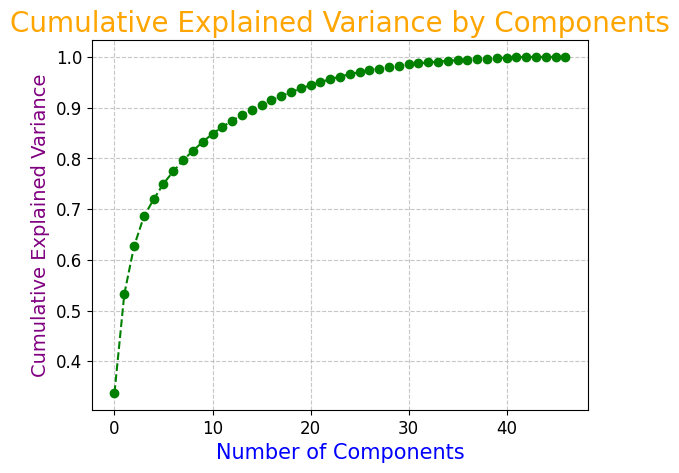

In [ ]:
# Plotting explained variance versus number of components
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--', color='green')
plt.xlabel('Number of Components', size=15, color='blue')
plt.ylabel('Cumulative Explained Variance', size=14, color='purple')
plt.title('Cumulative Explained Variance by Components', size=20, color='orange')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(size=12, color='black')
plt.yticks(size=12, color='black')
plt.show()

In [ ]:
# Initialize PCA with 3 components
pca = PCA(n_components=3)

# Fit PCA to the scaled features
pca.fit(scaled_df[features])

# Print explained variation per principal component
print('Explained variation per principal component:', pca.explained_variance_ratio_)

# Print cumulative variance explained by 3 principal components
print('Cumulative variance explained by 3 principal components: {:.2%}'.format(
                                        np.sum(pca.explained_variance_ratio_)))

# Transform the scaled features using PCA
df_pca = pca.transform(scaled_df[features])

Explained variation per principal component: [0.33758184 0.19460611 0.09467712]
Cumulative variance explained by 3 principal components: 62.69%


##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

PCA (Principal Component Analysis) serves as a prevalent technique for dimensionality reduction. In this specific scenario, PCA was utilized to condense the dimensionality to 3, a choice informed by the distinctive shape of the elbow curve.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
# Importing necessary library
from sklearn.model_selection import train_test_split

# Assigning features and target variable
X = X_tfidf  # Created during vectorization
y = sentiment_df['Sentiment']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Providing information about the train and test sets
print("Number of transactions in X_train dataset:", X_train.shape[0])
print("Number of transactions in y_train dataset:", y_train.shape[0])
print("Number of transactions in X_test dataset:", X_test.shape[0])
print("Number of transactions in y_test dataset:", y_test.shape[0])


Number of transactions in X_train dataset: 7963
Number of transactions in y_train dataset: 7963
Number of transactions in X_test dataset: 1991
Number of transactions in y_test dataset: 1991


##### What data splitting ratio have you used and why?

Considering the dataset's size of around 10,000 records, I opted to split the data into an 80:20 ratio for training and testing, respectively, ensuring a substantial portion for model training while retaining an adequate amount for evaluation.

### 9. Handling Imbalanced Dataset

In [ ]:
# Calculate the percentage distribution of sentiment labels
sentiment_distribution = sentiment_df['Sentiment'].value_counts(normalize=True).mul(100).round(2)

# Display the percentage distribution
print(sentiment_distribution)

Sentiment
1    62.97
0    37.03
Name: proportion, dtype: float64


##### Do you think the dataset is imbalanced? Explain Why.

Based on the provided information, it seems that the dataset is not heavily imbalanced, as there is only a minor class imbalance. However, without specific details on the exact distribution of sentiment labels, it's challenging to conclusively determine the degree of imbalance. Nonetheless, a minor class imbalance typically does not pose significant challenges for analysis and model building.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation
from sklearn.cluster import KMeans

wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i,random_state = 20)
    km.fit(df_pca)
    wcss.append(km.inertia_)

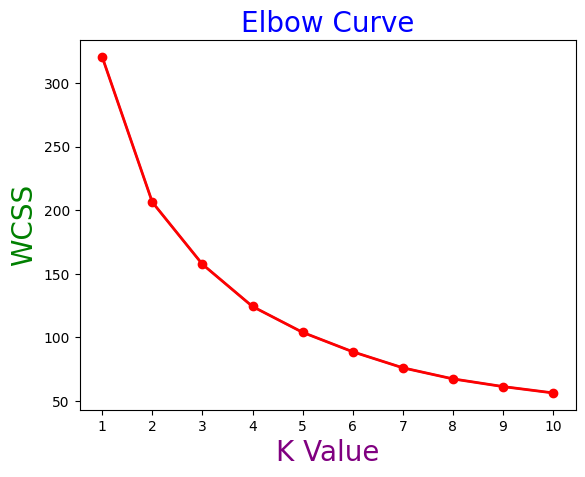

In [ ]:
# Elbow curve
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="o")
plt.xlabel("K Value", size = 20, color = 'purple')
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS", size = 20, color = 'green')
plt.title('Elbow Curve', size = 20, color = 'blue')
plt.show()

For n_clusters = 2 average silhouette_score is : 0.29567642426137847
For n_clusters = 3 average silhouette_score is : 0.2889316258358247
For n_clusters = 4 average silhouette_score is : 0.31055516701918606
For n_clusters = 5 average silhouette_score is : 0.3099932125405278
For n_clusters = 6 average silhouette_score is : 0.3245057933269514
For n_clusters = 7 average silhouette_score is : 0.3226029533212894
For n_clusters = 8 average silhouette_score is : 0.32242458372070093
For n_clusters = 9 average silhouette_score is : 0.32435187062322557


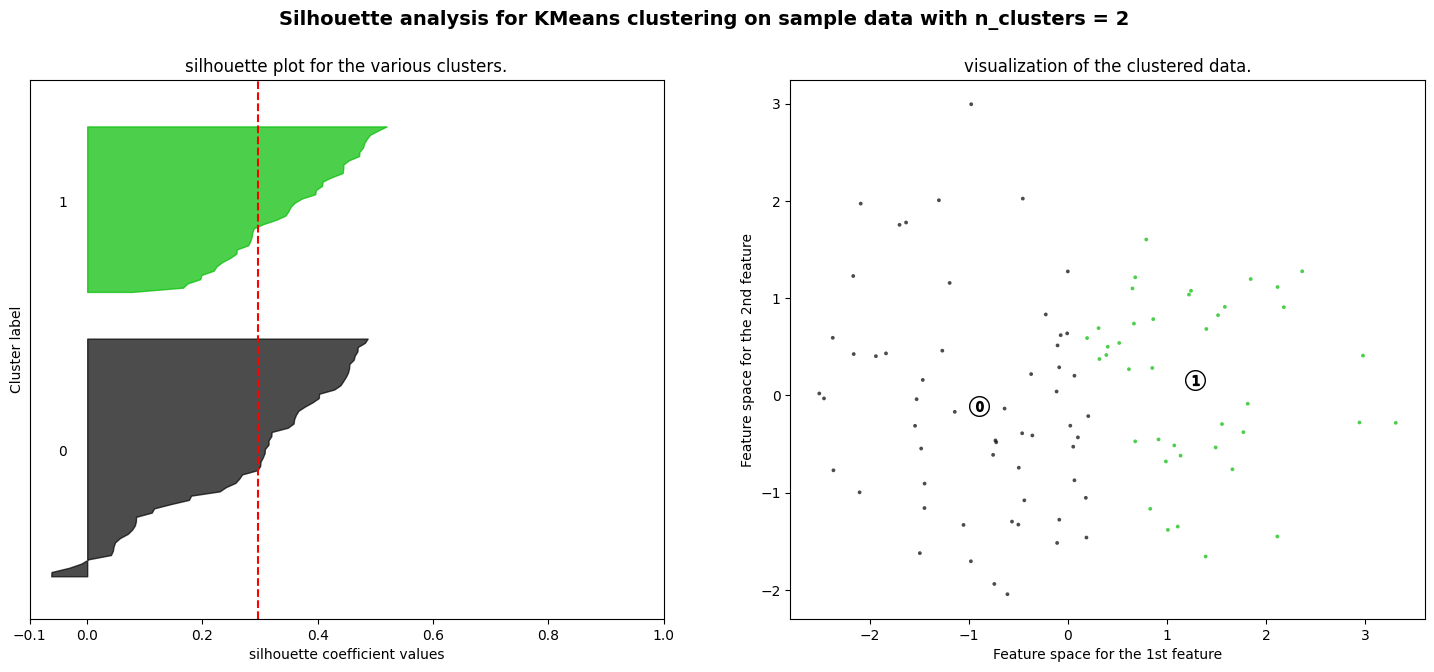

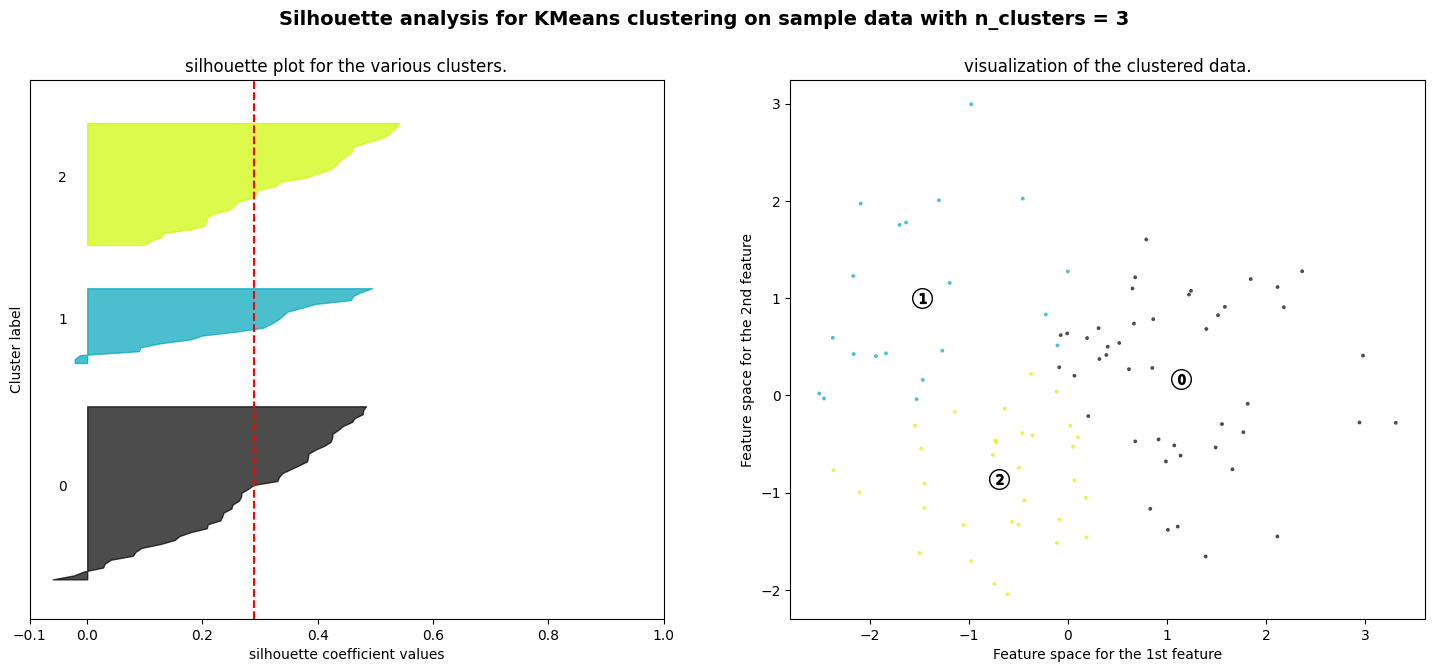

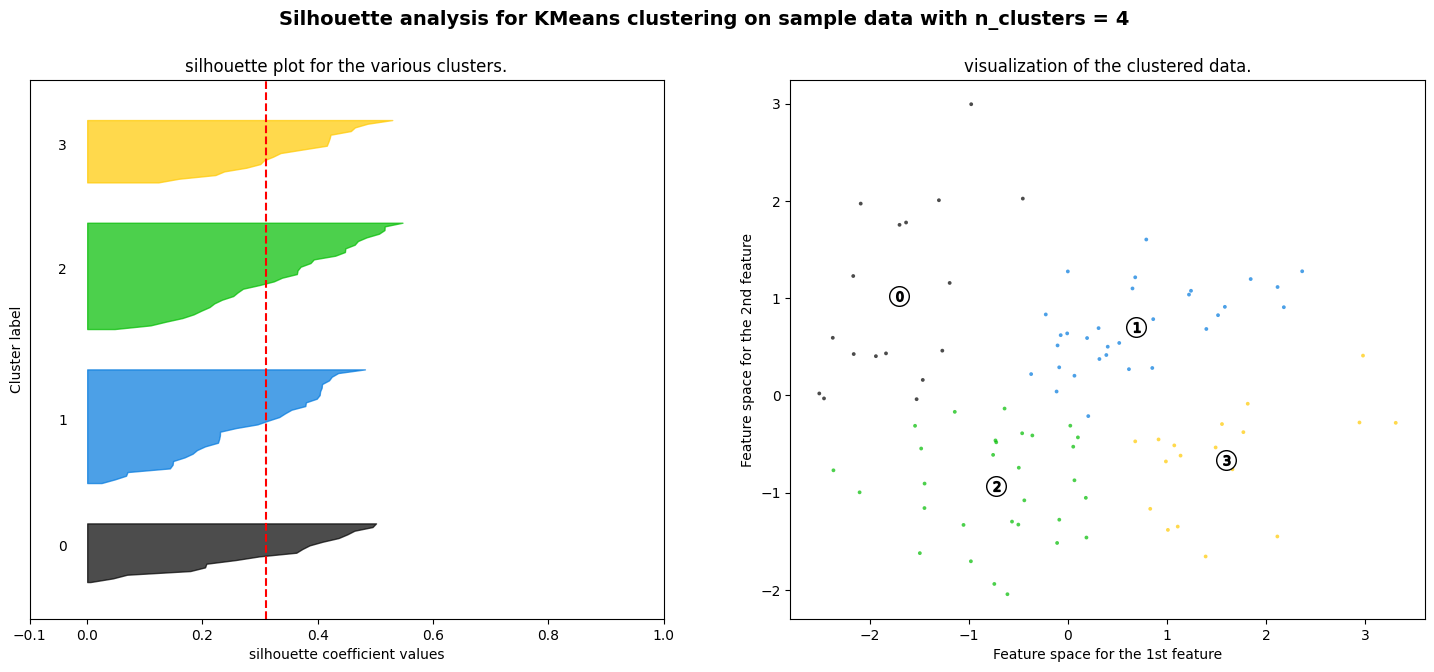

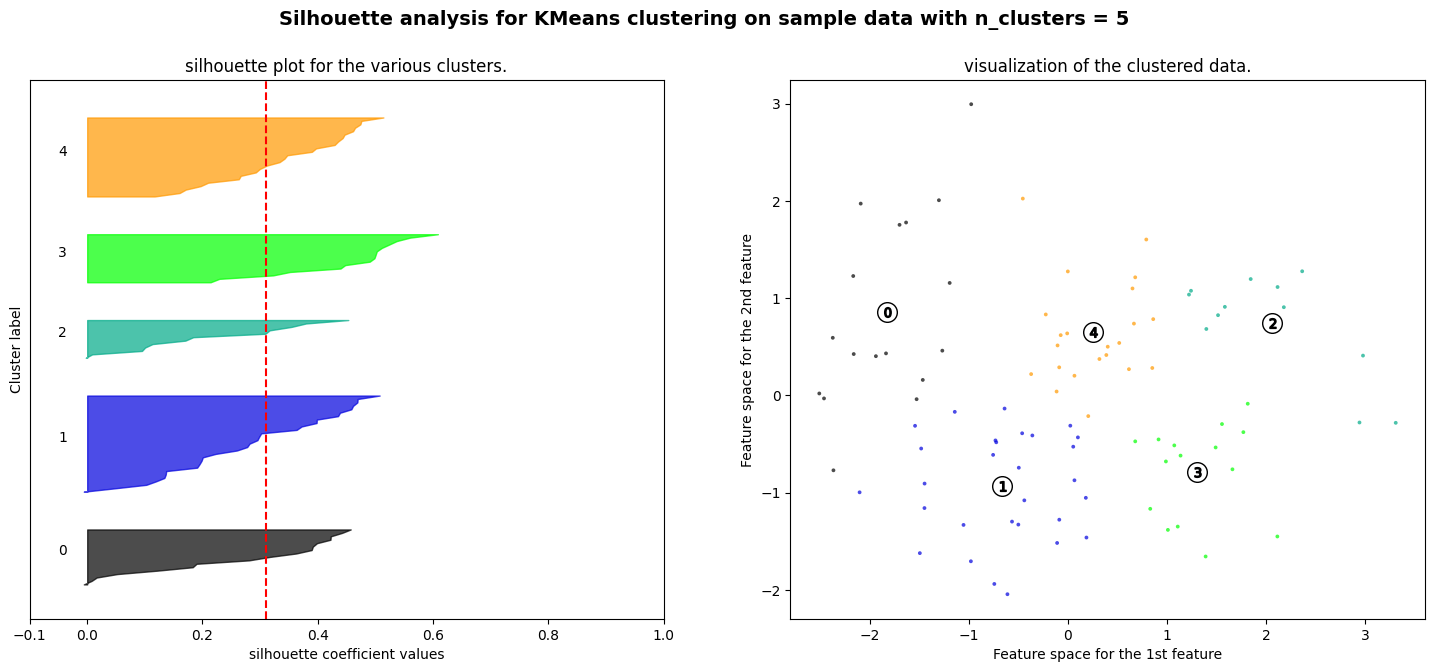

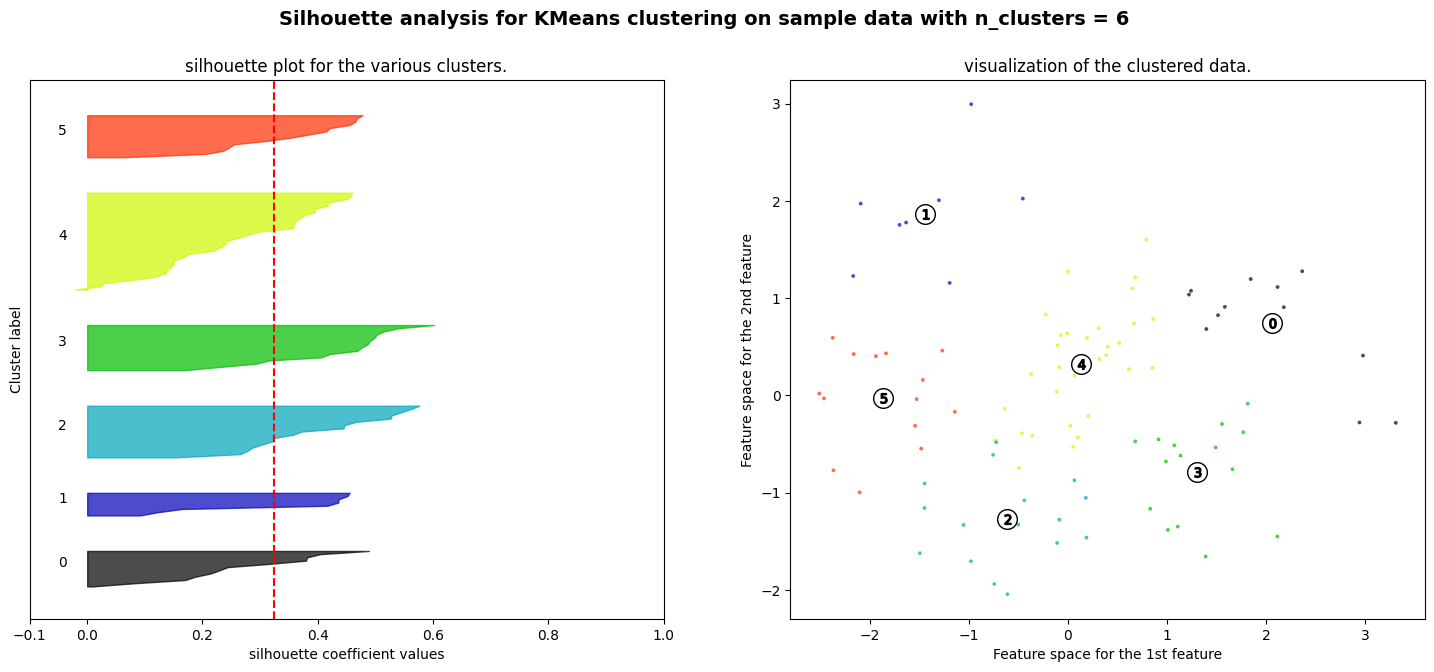

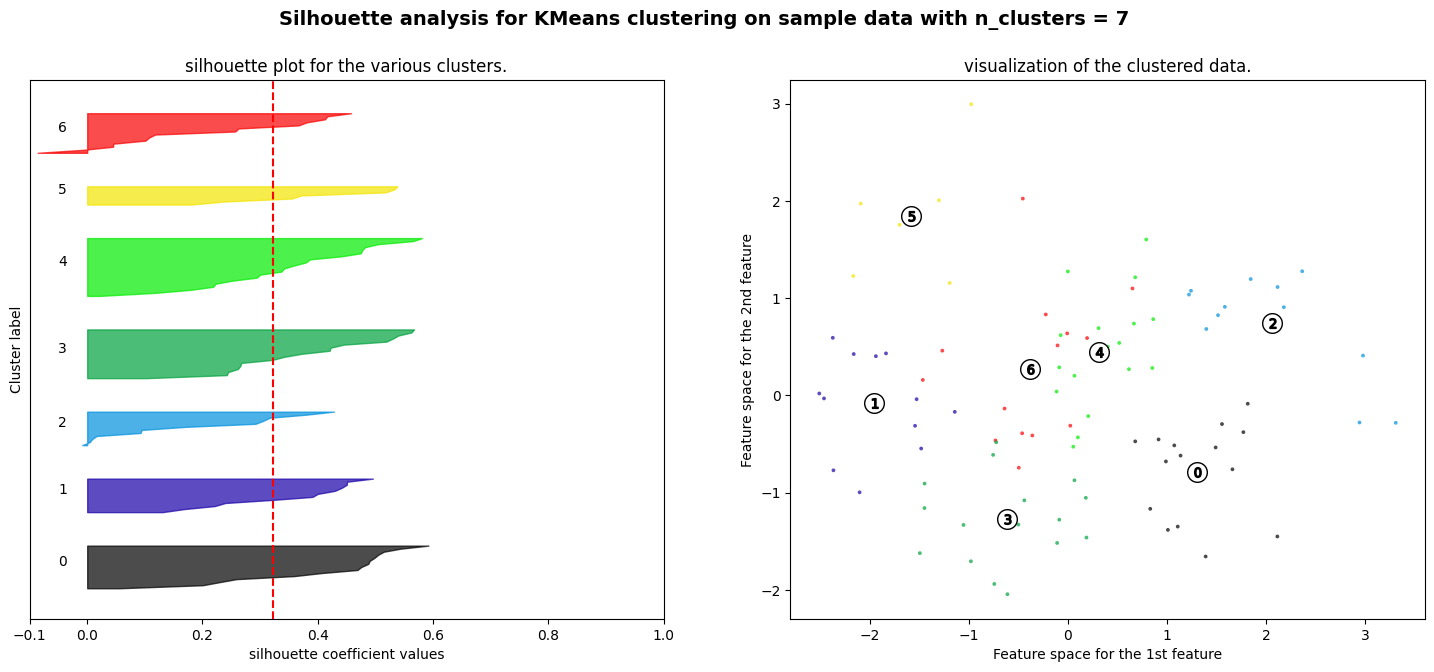

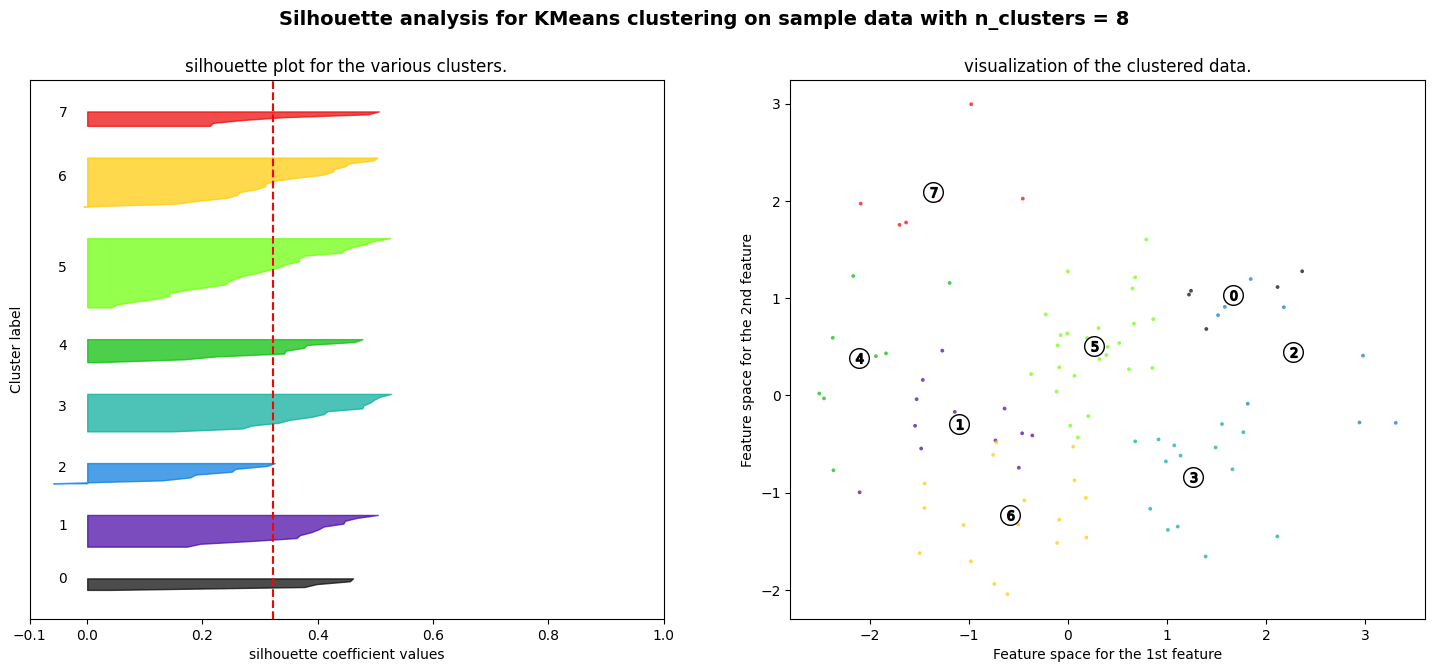

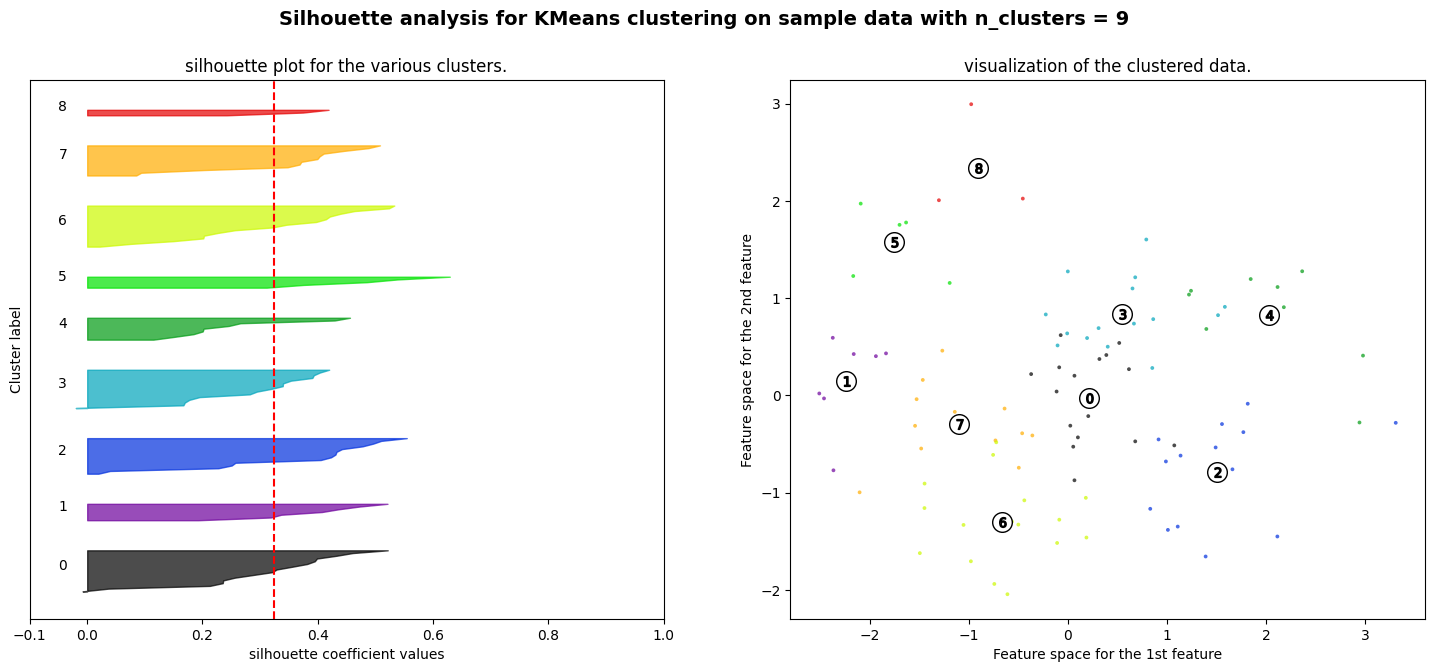

In [ ]:
#silhouette score
import matplotlib.cm as cm
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.model_selection import ParameterGrid
# candidates for the number of cluster
parameters = list(range(2,10))
#parameters
parameter_grid = ParameterGrid({'n_clusters': parameters})
best_score = -1
#visualizing Silhouette Score for individual clusters and the clusters made
for n_clusters in parameters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # 1st subplot is the silhouette plot
    # silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(df_pca) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df_pca)

    # silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df_pca, cluster_labels)
    print("For n_clusters =", n_clusters,
          "average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_pca, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("silhouette plot for the various clusters.")
    ax1.set_xlabel("silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(df_pca[:, 0], df_pca[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')
    #marker='$%d$' % i will give numer in cluster in 2 plot
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

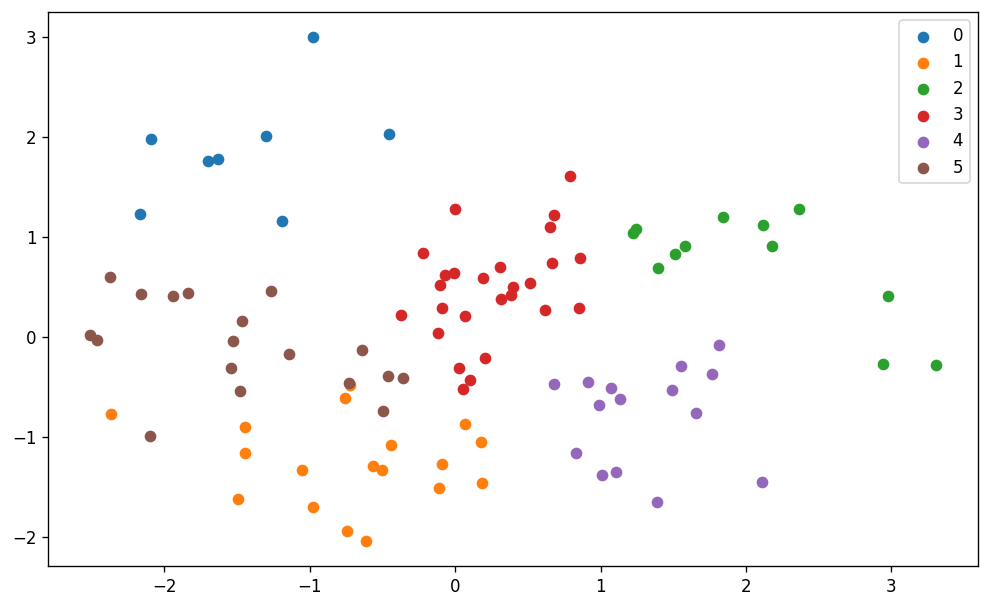

In [ ]:
#vizualizing the clusters and the datapoints in each clusters
plt.figure(figsize = (10,6), dpi = 120)

kmeans= KMeans(n_clusters = 6, init= 'k-means++', random_state = 42)
kmeans.fit(df_pca)

#predict the labels of clusters.
label = kmeans.fit_predict(df_pca)
#Getting unique labels
unique_labels = np.unique(label)

#plotting the results:
for i in unique_labels:
    plt.scatter(df_pca[label == i , 0] , df_pca[label == i , 1] , label = i)
plt.legend()
plt.show()

In [ ]:
kmeans_pca_df = pd.DataFrame(df_pca,columns=['PC1','PC2','PC3'],index=scaled_df.index)
kmeans_pca_df["label"] = label
kmeans_pca_df.sample(2)

PC1       PC2       PC3  label
Restaurant                                     
Desi Bytes  1.659123 -0.760374 -0.495044      4
KFC         1.769252 -0.378311 -0.466881      4

In [ ]:
# joining clusters
cluster_dummy.set_index(['Restaurant'],inplace=True)
cluster_dummy = cluster_dummy.join(kmeans_pca_df['label'])
cluster_dummy.sample(2)

Cost  Average_Rating  Total_Cuisine_Count  \
Restaurant                                                                  
Over The Moon Brew Company  7.090910            4.34                    5   
Pista House                 6.908755            3.23                    5   

                            American  Andhra  Arabian  Asian  BBQ  Bakery  \
Restaurant                                                                  
Over The Moon Brew Company         0       0        0      1    0       0   
Pista House                        0       0        0      0    0       1   

                            Beverages  ...  Pizza  Salad  Seafood  \
Restaurant                             ...                          
Over The Moon Brew Company          0  ...      0      0        0   
Pista House                         0  ...      0      0        0   

                            South Indian  Spanish  Street Food  Sushi  Thai  \
Restaurant                                                                    
Over The Moon Brew Company             0        0            0      0     0   
Pista House                            0        0            0      0     0   

                            Wraps  label  
Restaurant                                
Over The Moon Brew Company      0      5  
Pista House                     0      1  

[2 rows x 48 columns]

In [ ]:
# back to normal from log during transformation
cluster_dummy['Cost'] = np.expm1(cluster_dummy['Cost'])
cluster_dummy.sample(2)

Cost  Average_Rating  Total_Cuisine_Count  \
Restaurant                                                               
AB's - Absolute Barbecues  1500.0            4.88                    3   
Shanghai Chef 2             800.0            3.06                    4   

                           American  Andhra  Arabian  Asian  BBQ  Bakery  \
Restaurant                                                                 
AB's - Absolute Barbecues         0       0        0      0    0       0   
Shanghai Chef 2                   0       0        0      1    0       0   

                           Beverages  ...  Pizza  Salad  Seafood  \
Restaurant                            ...                          
AB's - Absolute Barbecues          0  ...      0      0        0   
Shanghai Chef 2                    0  ...      0      0        0   

                           South Indian  Spanish  Street Food  Sushi  Thai  \
Restaurant                                                                   
AB's - Absolute Barbecues             0        0            0      0     0   
Shanghai Chef 2                       0        0            0      0     1   

                           Wraps  label  
Restaurant                               
AB's - Absolute Barbecues      0      0  
Shanghai Chef 2                0      1  

[2 rows x 48 columns]

In [ ]:
clustering_result = cluster_dummy.copy().reset_index()
clustering_result = resto_df[['Restaurant','Cuisines']].merge(clustering_result[['Restaurant','Cost',
                  'Average_Rating',	'Total_Cuisine_Count','label']], on = 'Restaurant')
clustering_result.head()

Restaurant  \
0                 Beyond Flavours   
1                        Paradise   
2                        Flechazo   
3  Shah Ghouse Hotel & Restaurant   
4      Over The Moon Brew Company   

                                            Cuisines    Cost  Average_Rating  \
0  Chinese, Continental, Kebab, European, South I...   800.0            4.28   
1                     Biryani, North Indian, Chinese   800.0            4.70   
2       Asian, Mediterranean, North Indian, Desserts  1300.0            4.66   
3  Biryani, North Indian, Chinese, Seafood, Bever...   800.0            3.21   
4  Asian, Continental, North Indian, Chinese, Med...  1200.0            4.34   

   Total_Cuisine_Count  label  
0                    6      1  
1                    3      0  
2                    4      0  
3                    5      1  
4                    5      5

In [ ]:
# counting cluster observations
cluster_count = cluster_dummy['label'].value_counts().reset_index().rename(
    columns={'index':'label','label':'Total_Restaurant'}).sort_values(by='Total_Restaurant')
cluster_count

Total_Restaurant  count
5                 0      8
1                 1     18
4                 2     12
0                 3     26
3                 4     15
2                 5     18

In [ ]:
new_cluster_df = clustering_result.copy()
new_cluster_df['Cuisines'] = new_cluster_df['Cuisines'].str.split(',')
new_cluster_df = new_cluster_df.explode('Cuisines')
#removing extra trailing space from cuisines after exploded
new_cluster_df['Cuisines'] = new_cluster_df['Cuisines'].apply(lambda x: x.strip())
new_cluster_df.sample(5)

Restaurant      Cuisines    Cost  Average_Rating  \
4            Over The Moon Brew Company       Chinese  1200.0        4.340000   
95                             Triptify  North Indian   400.0        3.550000   
85                  American Wild Wings      American   600.0        3.974026   
35  Banana Leaf Multicuisine Restaurant  North Indian   700.0        3.690000   
39                          Frio Bistro       Italian  1200.0        3.610000   

    Total_Cuisine_Count  label  
4                     5      5  
95                    1      2  
85                    4      3  
35                    5      1  
39                    4      5

In [ ]:
#printing cuisine list for each cluster
for cluster in new_cluster_df['label'].unique().tolist():
  print('Cuisine List for Cluster :', cluster,'\n')
  print(new_cluster_df[new_cluster_df["label"]== cluster]['Cuisines'].unique(),'\n')
  print('='*120)

Cuisine List for Cluster : 1 

['Chinese' 'Continental' 'Kebab' 'European' 'South Indian' 'North Indian'
 'Biryani' 'Seafood' 'Beverages' 'Healthy Food' 'American' 'Mexican'
 'Italian' 'Salad' 'Bakery' 'Mughlai' 'Juices' 'Andhra' 'Hyderabadi'
 'Finger Food' 'Thai' 'Indonesian' 'Asian' 'Sushi' 'Momos' 'Desserts'
 'Cafe' 'Burger' 'Fast Food'] 

Cuisine List for Cluster : 0 

['Biryani' 'North Indian' 'Chinese' 'Asian' 'Mediterranean' 'Desserts'
 'European' 'American' 'BBQ' 'Modern Indian' 'Continental' 'Sushi'] 

Cuisine List for Cluster : 5 

['Asian' 'Continental' 'North Indian' 'Chinese' 'Mediterranean' 'Seafood'
 'Goan' 'Kebab' 'BBQ' 'Italian' 'Finger Food' 'Japanese' 'Salad' 'Sushi'
 'South Indian' 'European' 'Spanish' 'Andhra' 'Mughlai' 'Beverages'] 

Cuisine List for Cluster : 2 

['Lebanese' 'Ice Cream' 'Desserts' 'North Indian' 'Fast Food' 'Asian'
 'Beverages' 'Bakery' 'Momos' 'Street Food' 'Arabian'] 

Cuisine List for Cluster : 4 

['Street Food' 'North Indian' 'Fast Food' 'Bu

I chose the K-means clustering method for this analysis because the data lacks hierarchical categories, which makes K-means a good fit. I also found that K = 6 is the optimal number of clusters, as it produces the highest silhouette score.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

I used both the elbow curve and silhouette score analysis to determine the optimal number of clusters (K) for K-means clustering. The elbow curve identifies the point where the within-cluster sum of squares (WCSS) starts to plateau, suggesting the ideal number of clusters. Meanwhile, the silhouette score evaluates cluster separation, with higher values indicating better-defined clusters. By combining these methods, I aimed to find the K value that best balances cluster separation and quality.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

The main enhancement noted is in selecting the optimal value for K. By analyzing silhouette scores across various K values, I determined that K = 6 produced the highest silhouette score, indicating superior cluster separation. This improvement in the silhouette score suggests that clustering with K = 6 results in more well-defined and distinct clusters compared to other K values, leading to higher cluster quality.

### ML Model - 2

In [ ]:
!pip install lda

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.decomposition import LatentDirichletAllocation

topic_range = range(2, 11)
silhouette_scores = []

for n_components in topic_range:
    lda = LatentDirichletAllocation(n_components=6)
    lda.fit(X)
    labels = lda.transform(X).argmax(axis=1)
    silhouette_scores.append(silhouette_score(X, labels))


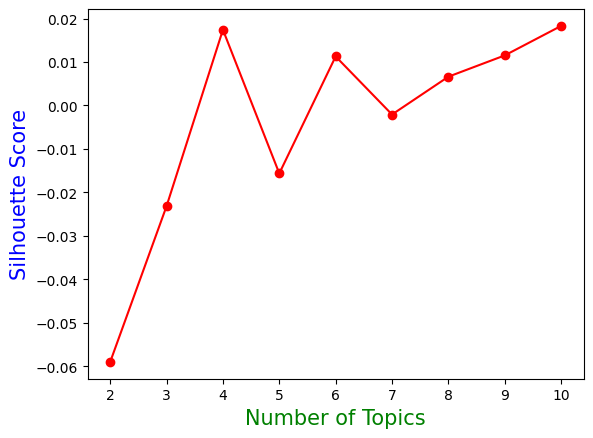

In [ ]:
#plotting silhouette score
plt.plot(topic_range, silhouette_scores, marker ='o', color='red')
plt.xlabel('Number of Topics', size = 15, color = 'green')
plt.ylabel('Silhouette Score', size = 15, color = 'blue')
plt.show()

In [ ]:
# LDA model
lda = LatentDirichletAllocation(n_components=4)
lda.fit(X)

LatentDirichletAllocation(n_components=4)

In [ ]:
!pip install pyLDAvis

In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook(local=True)

In [ ]:
topic_term_dists = lda.components_ / lda.components_.sum(axis=1)[:,None]
doc_lengths = X_tfidf.sum(axis=1).getA1()
term_frequency = X_tfidf.sum(axis=0).getA1()
lda_doc_topic_dists = lda.transform(X)
doc_topic_dists = lda_doc_topic_dists / lda_doc_topic_dists.sum(axis=1)[:,None]
vocab = vectorizer.get_feature_names_out()

In [ ]:
# ploting the clusters top 30 terms
# lda_pyLDAvis = pyLDAvis.prepare(lda, X, vectorizer)
a = pyLDAvis.prepare(topic_term_dists,doc_topic_dists,doc_lengths,vocab,term_frequency)
pyLDAvis.display(a)

In [ ]:
review_sentiment_prediction = review_df[review_df.columns.to_list()].copy()
topic_results = lda.transform(X)
review_sentiment_prediction['Prediction'] = topic_results.argmax(axis=1)
review_sentiment_prediction.sample(5)

Restaurant              Reviewer  \
8622                       The Chocolate Room        HImanshu Gupta   
6540  Komatose - Holiday Inn Express & Suites  Tanusree Chakraborty   
3799                      Kritunga Restaurant           Manasa Modi   
1399            The Lal Street - Bar Exchange         Triveni Arora   
803                               Hyper Local         Farzana Shaik   

                                                 Review  Rating  \
8622  The place lost its charm and service. Things l...     1.0   
6540  Excellent food n drinks....amazing atmosphere....     5.0   
3799  afood is not as per recipe. so, you guys don't...     1.0   
1399  Great ambience and their service was very good...     4.0   
803   My peace of advice pls don't waste your money....     1.0   

                       Metadata                Time  Pictures  \
8622                  3 Reviews 2018-12-25 22:19:00         0   
6540  17 Reviews , 91 Followers 2018-10-25 20:09:00         0   
3799                   1 Review 2018-07-22 14:32:00         0   
1399  22 Reviews , 46 Followers 2019-03-07 13:13:00         0   
803                    1 Review 2019-05-19 19:21:00         1   

      Reviewer_Total_Review  Reviewer_Followers  Review_Year  Review_Month  \
8622                      3                 0.0         2018            12   
6540                     17                91.0         2018            10   
3799                      1                 0.0         2018             7   
1399                     22                46.0         2019             3   
803                       1                 0.0         2019             5   

      Review_Hour  Prediction  
8622           22           2  
6540           20           2  
3799           14           2  
1399           13           2  
803            19           2

TOP 100 WORDS FOR TOPIC #0


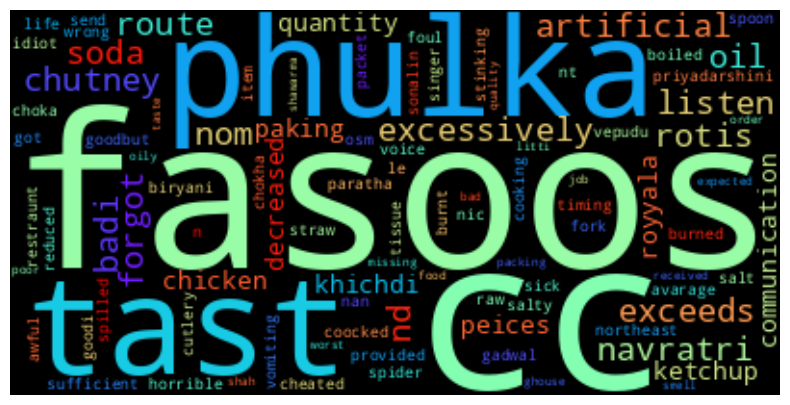

TOP 100 WORDS FOR TOPIC #1


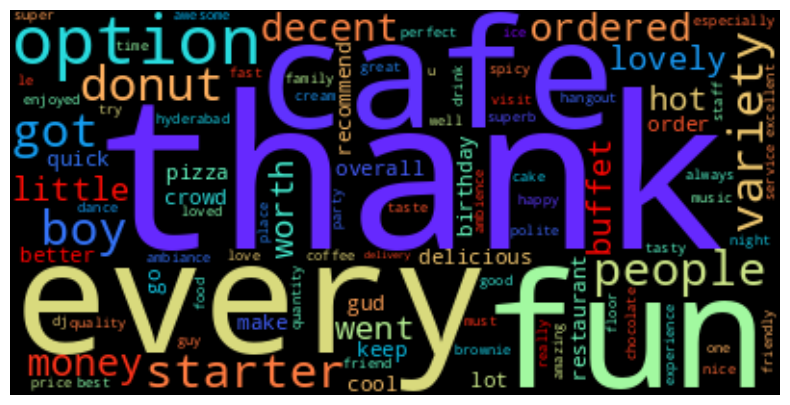

TOP 100 WORDS FOR TOPIC #2


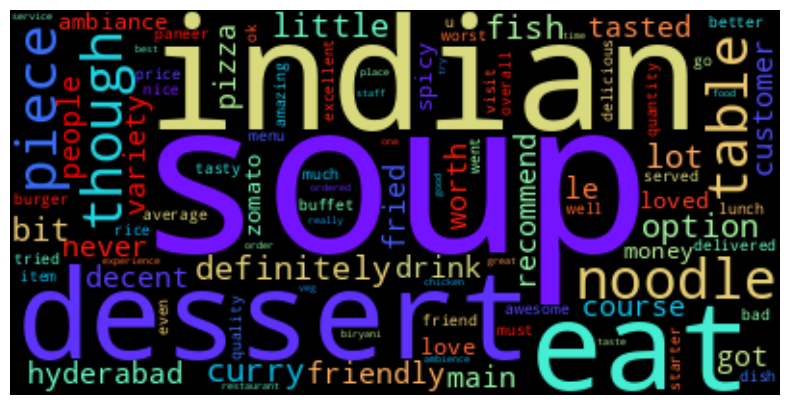

TOP 100 WORDS FOR TOPIC #3


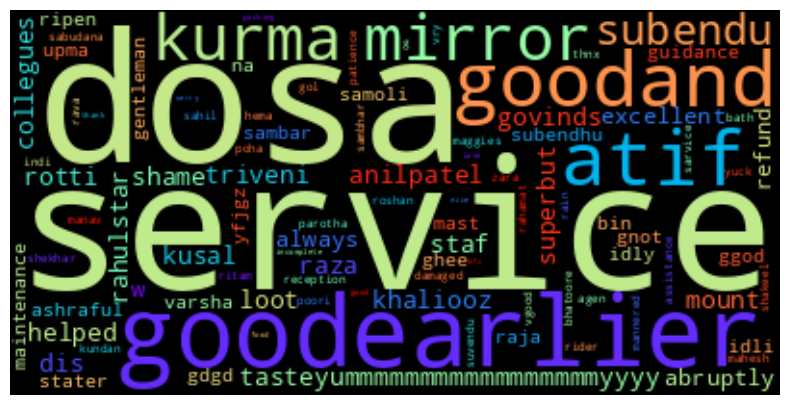

In [ ]:
from wordcloud import WordCloud
# Define the number of words to include in the word cloud
N = 100

# Create a list of strings for each topic
topic_text = []
for index, topic in enumerate(lda.components_):
    topic_words = [vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-N:]]
    topic_text.append(" ".join(topic_words))

# Create a word cloud for each topic
for i in range(len(topic_text)):
    print(f'TOP 100 WORDS FOR TOPIC #{i}')
    wordcloud = WordCloud(background_color="black",colormap='rainbow').generate(topic_text[i])
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    print('='*120)

In [ ]:
for sentiment in review_sentiment_prediction['Prediction'].unique().tolist():
  print('Prediction = ',sentiment,'\n')
  print(review_sentiment_prediction[review_sentiment_prediction['Prediction'] ==
        sentiment]['Rating'].value_counts())
  print('='*120)

Prediction =  2 

Rating
5.0    2123
4.0    1881
1.0    1481
3.0    1012
2.0     583
4.5      50
3.5      36
2.5      18
1.5       9
Name: count, dtype: int64
Prediction =  1 

Rating
5.0    1244
4.0     389
3.0     125
1.0     122
2.0      62
4.5      19
3.5      11
2.5       1
Name: count, dtype: int64
Prediction =  0 

Rating
1.0    101
5.0     69
3.0     32
2.0     22
4.0     16
Name: count, dtype: int64
Prediction =  3 

Rating
5.0    390
4.0     87
1.0     31
3.0     23
2.0     17
Name: count, dtype: int64


###Supervised ML

In [ ]:
#defining function to calculate score
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score
from tabulate import tabulate
import itertools


#calculating score
def calculate_scores(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    roc_auc = roc_auc_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    # Get the confusion matrix for both train and test

    cm = confusion_matrix(y_test, y_pred)
    plt.imshow(cm, cmap='Wistia')

    # Add labels to the plot
    class_names = ["Positive", "Negative"]
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)

    # Add values inside the confusion matrix
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

    # Add a title and x and y labels
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')

    plt.show()
    print(cm)
    return roc_auc, f1, accuracy, precision, recall

#printing result
def print_table(model, X_train, y_train, X_test, y_test):
    roc_auc, f1, accuracy, precision, recall = calculate_scores(model, X_train, y_train, X_test, y_test)
    table = [["ROC AUC", roc_auc], ["Precision", precision],
             ["Recall", recall], ["F1", f1], ["Accuracy", accuracy]]
    print(tabulate(table, headers=["Metric", "Score"]))

###Logistic and XGBoost algorithms

In [ ]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
clf = LogisticRegression()
xgb = XGBClassifier()

In [ ]:
# logitic regression GridSearchCV
param_dict = {'C': [0.1,1,10,100,1000],'penalty': ['l1', 'l2'],'max_iter':[1000]}
clf_grid = GridSearchCV(clf, param_dict,n_jobs=-1, cv=5, verbose = 5,scoring='recall')
clf_grid.fit(X_train,y_train)
# XGBoost gridsearchCV
xgb_param={'n_estimators': [100,125,150],'max_depth': [7,10,15],'criterion': ['entropy']}
xgb_grid=GridSearchCV(estimator=xgb,param_grid = xgb_param,cv=3,scoring='recall',verbose=5,n_jobs = -1)
xgb_grid.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 3 folds for each of 9 candidates, totalling 27 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [7, 10, 15],
                         'n_estimators': [100, 125, 150]},
             scoring='recall', verbose=5)

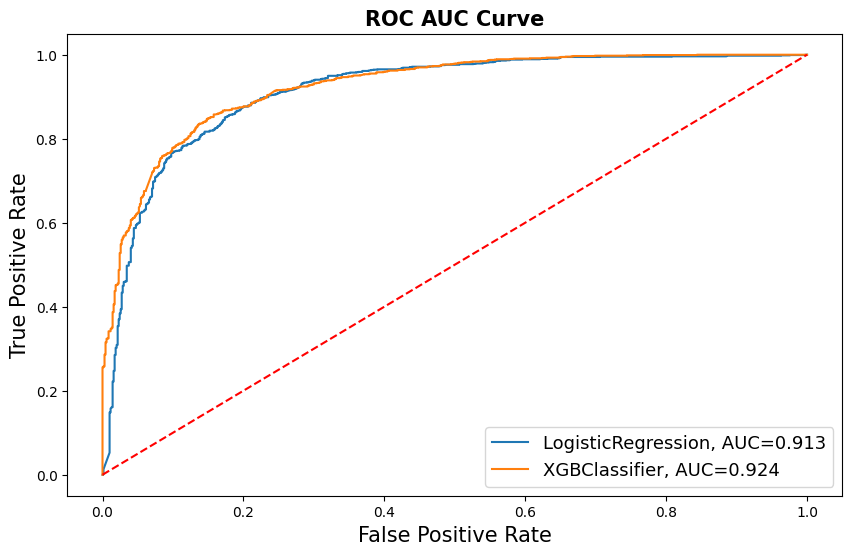

In [ ]:
#Plotting graph
from sklearn.metrics import roc_curve
# finding the best parameters for all the models
log_reg_best = clf_grid.best_estimator_
xgbc_best = xgb_grid.best_estimator_

# predicting the sentiment by all models
y_preds_proba_lr = log_reg_best.predict_proba(X_test)[::,1]
y_preds_proba_xgbc = xgbc_best.predict_proba(X_test)[::,1]

classifiers_proba = [(log_reg_best, y_preds_proba_lr),
                    (xgbc_best, y_preds_proba_xgbc)]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for pair in classifiers_proba:

    fpr, tpr, _ = roc_curve(y_test,  pair[1])
    auc = roc_auc_score(y_test, pair[1])

    result_table = result_table._append({'classifiers':pair[0].__class__.__name__,
                                        'fpr':fpr,
                                        'tpr':tpr,
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

# ploting the roc auc curve for all models
fig = plt.figure(figsize=(10,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'],
             result_table.loc[i]['tpr'],
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))

plt.plot([0,1], [0,1],'r--')

plt.xlabel("False Positive Rate", fontsize=15)

plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC AUC Curve', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

####Which hyperparameter optimization technique have you used and why?

I used GridSearch despite its time-consuming nature because it's a robust optimization technique that often delivers the best results.

####Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

The method has yielded excellent results, demonstrating its effectiveness.

####3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

The ROC AUC score measures the likelihood of correctly classifying new observations, making it highly valuable for business decisions.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

In this project, we implemented a range of data preprocessing techniques to improve the quality of our textual dataset, making it suitable for machine learning applications.

**Optimized Clustering:** We refined the K-means clustering process by selecting the optimal number of clusters (K=6), which enhanced the Silhouette Score and indicated better cluster separation.

**Topic Modeling:** Using Latent Dirichlet Allocation (LDA), we identified key topics within the reviews, providing valuable insights into the prevalent themes.

**Model Performance:** Supervised models, such as Logistic Regression and XGBoost, showed significant improvements in key evaluation metrics following hyperparameter tuning.

**Improved Precision:** We achieved high precision, crucial for accurately predicting positive sentiment in sentiment analysis, which is vital for businesses interpreting customer feedback.

**Enhanced Recall:** Our models demonstrated high recall, ensuring effective capture of positive instances, which is essential for applications that must not overlook positive cases.

**Balanced F1-Score:** We attained a balanced F1-score, offering a good trade-off between precision and recall, beneficial for applications requiring a balance between accuracy and coverage.

**ROC AUC Significance:** After tuning, the ROC AUC score improved, underscoring the model's effectiveness in distinguishing between positive and negative instances, which is key for classification accuracy.

**Model Deployment:** We discussed the importance of saving the best-performing model in a deployable format, preparing it for real-world applications.

**Future Prospects:** We highlighted the potential for live server deployment and emphasized the importance of evaluating the model on unseen data to ensure real-world applicability.

**Impact on Business:** Our project has the potential to provide businesses with data-driven insights, thereby enhancing their decision-making capabilities.

**Data Transformation:** From text preprocessing to model selection, our project demonstrates the transformative impact of data science, turning raw data into actionable knowledge.



### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***